# World Health Statistics
### Merged according to category similarity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import warnings
from itertools import product
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [2]:
# Define the directory path
directory = r"D:\IE 423\Project\ie423-2024-termproject-the-a-team\ie423-2024-termproject-the-a-team\DataSets\WorldHealth"

# Define the filenames for each group of CSV files
mortality_files = ["infantMortalityRate.csv", "under5MortalityRate.csv", "neonatalMortalityRate.csv", "mortalityRatePoisoning.csv", "crudeSuicideRates.csv", "30-70cancerChdEtc.csv"]
life_expectancy_files = ["lifeExpectancyAtBirth.csv",  "HALElifeExpectancyAtBirth.csv"]
region_files =["WHOregionLifeExpectancyAtBirth.csv", "HALeWHOregionLifeExpectancyAtBirth.csv","%HaleInLifeExpectancy.csv"]
health_services_files = ["basicDrinkingWaterServices.csv", "atLeastBasicSanitizationServices.csv", "safelySanitization.csv", "basicHandWashing.csv", "birthAttendedBySkilledPersonal.csv"]
disease_incidence_files = ["interventionAgianstNTDs.csv", "incedenceOfMalaria.csv", "incedenceOfTuberculosis.csv", "hepatitusBsurfaceAntigen.csv", "newHivInfections.csv"]
maternal_health_files = ["maternalMortalityRatio.csv"]

# Function to merge CSV files
def merge_csv_files(files):
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            dfs.append(df)
        else:
            print(f"File '{file}' not found.")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        return merged_df
    else:
        return None


# Merge mortality files
merged_mortality = merge_csv_files(mortality_files)

# Merge life expectancy files
merged_life_expectancy = merge_csv_files(life_expectancy_files)

# Merge region files
merged_region_expectancy = merge_csv_files(region_files)

# Merge health services files
merged_health_services = merge_csv_files(health_services_files)

# Merge disease incidence files
merged_disease_incidence = merge_csv_files(disease_incidence_files)

# Merge maternal health files
merged_maternal_health = merge_csv_files(maternal_health_files)


In [3]:
# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Loop through each CSV file
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(directory, file)
    
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Display basic information about the DataFrame
    print(f"Information about {file}:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())
    print("\nSample data:")
    print(df.head())
    print("\n\n")


Information about %HaleInLifeExpectancy.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      72 non-null     object 
 1   Period                        72 non-null     int64  
 2   Indicator                     72 non-null     object 
 3   Dim1                          72 non-null     object 
 4   Hale Expectency               72 non-null     float64
 5   Life expectany                72 non-null     float64
 6   Unnamed: 6                    72 non-null     float64
 7   % OF HALE in life expectancy  72 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.6+ KB
None

Summary statistics:
            Period  Hale Expectency  Life expectany  Unnamed: 6  \
count    72.000000        72.000000       72.000000   72.000000   
mean   2011.000000        61.403333      

### Merged Mortality

In [4]:
if merged_mortality is not None:
    print("Merged Mortality Data:")
    print(merged_mortality.head())

Merged Mortality Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2019  Infant mortality rate (probability of dying be...   
1  Afghanistan    2019  Infant mortality rate (probability of dying be...   
2  Afghanistan    2019  Infant mortality rate (probability of dying be...   
3  Afghanistan    2018  Infant mortality rate (probability of dying be...   
4  Afghanistan    2018  Infant mortality rate (probability of dying be...   

         Dim1        First Tooltip  
0  Both sexes  46.51 [37.71-55.82]  
1        Male    49.8 [40.2-59.95]  
2      Female  43.05 [34.82-51.96]  
3  Both sexes  48.04 [39.94-56.32]  
4        Male   51.35 [42.56-60.4]  


 **The output displays columns like Location, Period, Indicator, Dim1, and First Tooltip
The First Tooltip column has ranges so must look on that.
Dim1 might be dropped**

In [5]:
# Check for missing values in the merged_life_expectancy DataFrame
missing_values_mortality = merged_mortality.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_mortality)


       Location  Period  Indicator   Dim1  First Tooltip
0         False   False      False  False          False
1         False   False      False  False          False
2         False   False      False  False          False
3         False   False      False  False          False
4         False   False      False  False          False
...         ...     ...        ...    ...            ...
77363     False   False      False  False          False
77364     False   False      False  False          False
77365     False   False      False  False          False
77366     False   False      False  False          False
77367     False   False      False  False          False

[77368 rows x 5 columns]


**False means no null values. There are no missing values to deal with.**

#### Check Unique Values

In [6]:
unique_counts = merged_mortality.nunique()
print(unique_counts)

Location           200
Period              70
Indicator            6
Dim1                 3
First Tooltip    69311
dtype: int64


In [7]:
merged_mortality.describe()

,Period
count,77368.000000
mean,1991.856969
std,18.531457
min,1950.000000
25%,1978.000000
50%,1995.000000
75%,2008.000000
max,2019.000000


In [8]:
print(merged_mortality.dtypes)

Location         object
Period            int64
Indicator        object
Dim1             object
First Tooltip    object
dtype: object


**location, indicator, dim1, first tooltip are all categorical variables.**

**location, indicator, dim1, first tooltip are all categorical variables. <br>
First Tooltip should be numerical so this will be converted. <br>
 Location and Indicators will be encoded since they are categorical. <br>
 Location: Represents the location or country name where the data was collected. <br>
Period: Indicates the year or time period of the data entry.<br>
Indicator: Describes the type of mortality indicator being measured (e.g., infant mortality rate).<br>
Dim1: Likely represents a demographic dimension such as gender or age group.<br>
First Tooltip: Contains the numerical value of the mortality rate or a related metric. <br>
Dim1 is irrelevant to our main question so will be dropped.**

In [9]:
merged_mortality.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82]
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95]
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96]
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32]
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4]


In [10]:
# Remove brackets and values inside them, ranges are unnecessary 
merged_mortality['First Tooltip'] = merged_mortality['First Tooltip'].str.extract(r'(\d+\.\d+)', expand=False)

# Convert 'First Tooltip' to float
merged_mortality['First Tooltip'] = merged_mortality['First Tooltip'].astype(float)

# Print the cleaned DataFrame
merged_mortality.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35


In [11]:
#Dim1 is irrelevant to our analysis so we will drop it 

# Print the columns in your DataFrame
print(merged_mortality.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_mortality.columns:
    # Drop the 'Dim1' column
    merged_mortality.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_mortality.head()


Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,51.35


In [12]:
merged_mortality.describe()

,Period,First Tooltip
count,77368.000000,69126.000000
mean,1991.856969,60.881054
std,18.531457,65.126847
min,1950.000000,0.730000
25%,1978.000000,14.510000
50%,1995.000000,35.920000
75%,2008.000000,86.667500
max,2019.000000,429.700000


#### Check for Duplicates

In [13]:
duplicate_rows = merged_mortality[merged_mortality.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
           Location  Period  \
4649   Burkina Faso    1960   
13556         India    1998   
21782         Niger    1984   
23575          Peru    1960   
25720   Saint Lucia    1954   
...             ...     ...   
77361      Zimbabwe    2010   
77363      Zimbabwe    2005   
77364      Zimbabwe    2005   
77366      Zimbabwe    2000   
77367      Zimbabwe    2000   

                                               Indicator  First Tooltip  
4649   Infant mortality rate (probability of dying be...         144.50  
13556  Infant mortality rate (probability of dying be...          71.34  
21782  Infant mortality rate (probability of dying be...         124.90  
23575  Infant mortality rate (probability of dying be...         145.70  
25720  Infant mortality rate (probability of dying be...         122.50  
...                                                  ...            ...  
77361  Probability (%) of dying between age 30 and ex...            NaN  
77363  Probability 

#### Visualizations

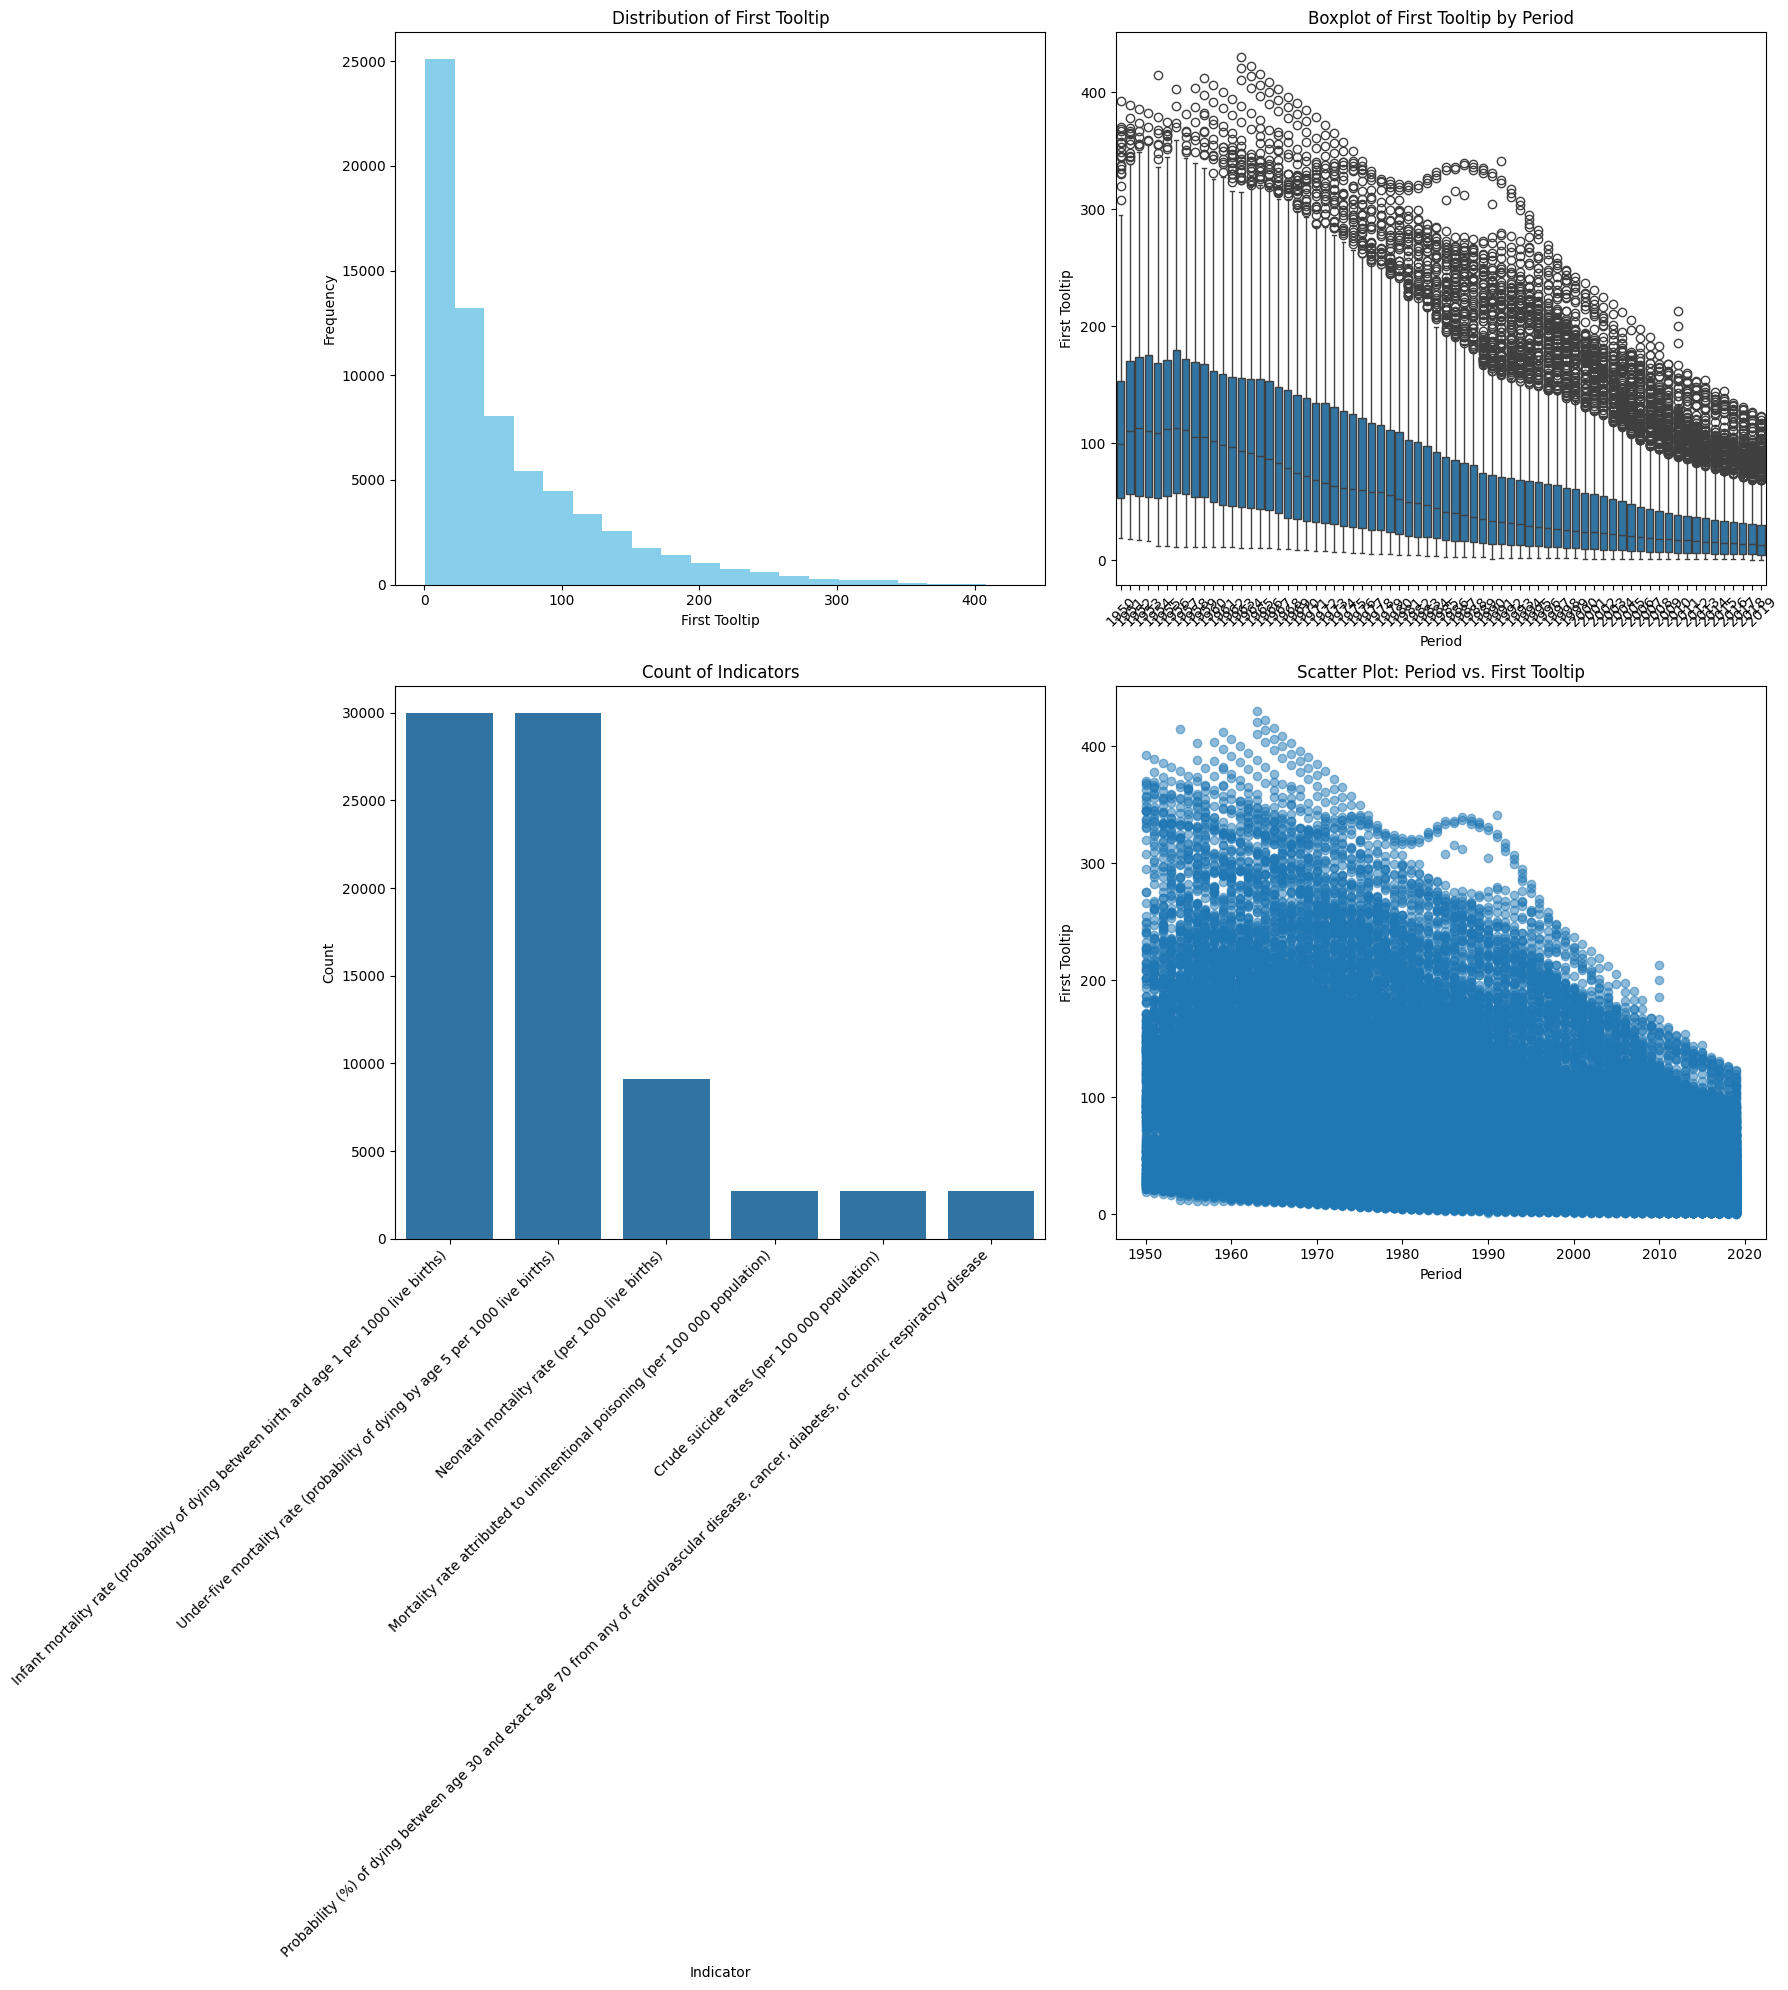

In [14]:
plt.figure(figsize=(18, 20))

# Histogram for 'First Tooltip'
plt.subplot(2, 2, 1)
plt.hist(merged_mortality['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')

# Box plot for 'First Tooltip' grouped by 'Period'
plt.subplot(2, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_mortality)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for 'Indicator' frequencies
plt.subplot(2, 2, 3)
sns.countplot(x='Indicator', data=merged_mortality)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for 'Period' vs 'First Tooltip'
plt.subplot(2, 2, 4)
plt.scatter(merged_mortality['Period'], merged_mortality['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# Calculate the first and third quartiles
Q1 = merged_mortality['First Tooltip'].quantile(0.25)
Q3 = merged_mortality['First Tooltip'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = merged_mortality[(merged_mortality['First Tooltip'] < lower_bound) |
                                  (merged_mortality['First Tooltip'] > upper_bound)]

# Print the outliers
print("Outliers in 'First Tooltip' column:")
print(outliers)

Outliers in 'First Tooltip' column:
          Location  Period                                          Indicator  \
139    Afghanistan    1973  Infant mortality rate (probability of dying be...   
142    Afghanistan    1972  Infant mortality rate (probability of dying be...   
144    Afghanistan    1971  Infant mortality rate (probability of dying be...   
145    Afghanistan    1971  Infant mortality rate (probability of dying be...   
147    Afghanistan    1970  Infant mortality rate (probability of dying be...   
...            ...     ...                                                ...   
59934     Thailand    1952  Under-five mortality rate (probability of dyin...   
59936     Thailand    1951  Under-five mortality rate (probability of dyin...   
59937     Thailand    1951  Under-five mortality rate (probability of dyin...   
59939     Thailand    1950  Under-five mortality rate (probability of dyin...   
59940     Thailand    1950  Under-five mortality rate (probability of dyi

**The outliers here show that due to the extremely wide range in First Tooltip. The way to handle these is either through applying imputation and/or transformation. Thus, this will be decided after getting insights on all 3 datasets(health,income, meat).**

### Merged Life Expectency


In [16]:
if merged_life_expectancy is not None:
    print("Merged Life Expectancy Data:")
    print(merged_life_expectancy.head())

Merged Life Expectancy Data:
      Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04  


In [17]:
merged_life_expectancy.tail()

,Location,Period,Indicator,Dim1,First Tooltip
4388,Zimbabwe,2010,Healthy life expectancy (HALE) at birth (years),Male,44.25
4389,Zimbabwe,2010,Healthy life expectancy (HALE) at birth (years),Female,46.12
4390,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Both sexes,41.03
4391,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Male,40.39
4392,Zimbabwe,2000,Healthy life expectancy (HALE) at birth (years),Female,41.77


In [18]:
# Check for missing values in the merged_life_expectancy DataFrame
missing_values_life_expectancy = merged_life_expectancy.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_life_expectancy)


      Location  Period  Indicator   Dim1  First Tooltip
0        False   False      False  False          False
1        False   False      False  False          False
2        False   False      False  False          False
3        False   False      False  False          False
4        False   False      False  False          False
...        ...     ...        ...    ...            ...
4388     False   False      False  False          False
4389     False   False      False  False          False
4390     False   False      False  False          False
4391     False   False      False  False          False
4392     False   False      False  False          False

[4393 rows x 5 columns]


In [19]:
merged_life_expectancy.describe()

,Period,First Tooltip
count,4393.000000,4393.000000
mean,2010.979285,65.811598
std,7.237751,9.427245
min,1920.000000,25.370000
25%,2000.000000,60.070000
50%,2010.000000,66.280000
75%,2015.000000,72.200000
max,2019.000000,86.940000


In [20]:
print(merged_life_expectancy.dtypes)
#Mean: Use the mean when the data is normally distributed and does not have outliers.
#Median: Use the median when the data has outliers or is not normally distributed.
#Mode: Use the mode for categorical or discrete data, although in your case, you're dealing with continuous variables.

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object


In [21]:
merged_life_expectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [22]:
#Dim1 is irrelevant to our analysis so we will drop it 

# Print the columns in your DataFrame
print(merged_life_expectancy.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_life_expectancy.columns:
    # Drop the 'Dim1' column
    merged_life_expectancy.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_life_expectancy.head()

Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),63.21
1,Afghanistan,2019,Life expectancy at birth (years),63.29
2,Afghanistan,2019,Life expectancy at birth (years),63.16
3,Afghanistan,2015,Life expectancy at birth (years),61.65
4,Afghanistan,2015,Life expectancy at birth (years),61.04


#### Checking for Duplicate Rows

In [23]:
duplicate_rows = merged_life_expectancy[merged_life_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
      Location  Period                                        Indicator  \
3261    Kuwait    2010  Healthy life expectancy (HALE) at birth (years)   
3651      Oman    2019  Healthy life expectancy (HALE) at birth (years)   
3665  Pakistan    2015  Healthy life expectancy (HALE) at birth (years)   

      First Tooltip  
3261          69.21  
3651          64.51  
3665          55.78  


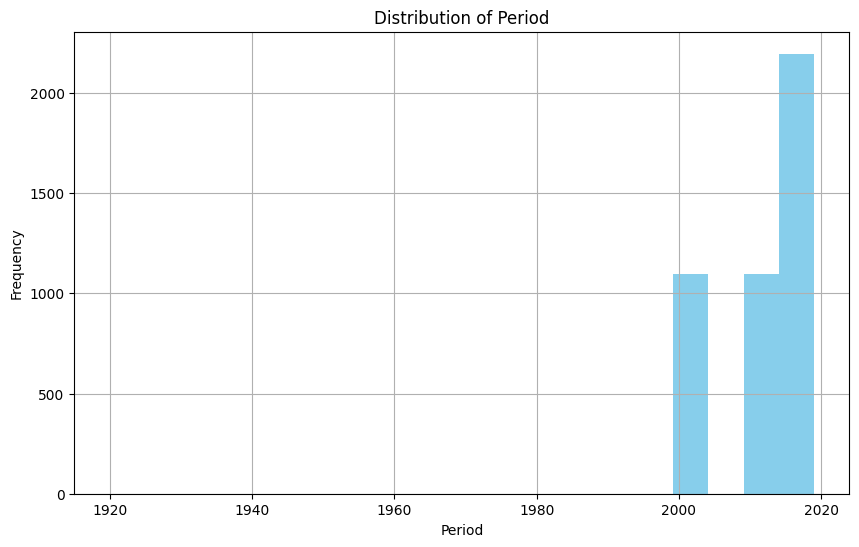

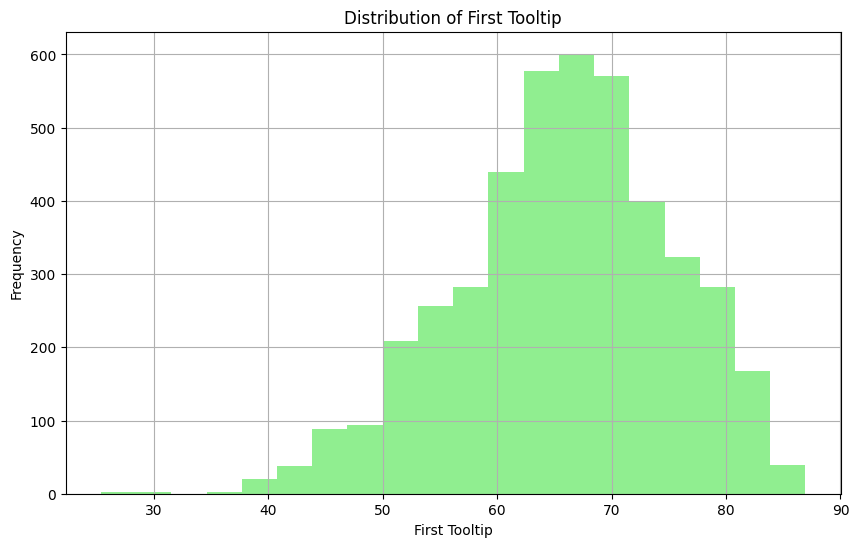

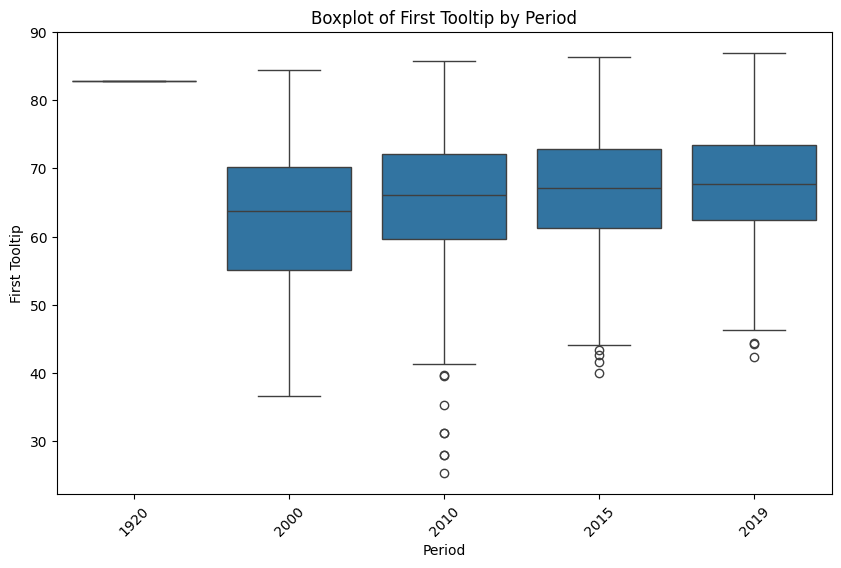

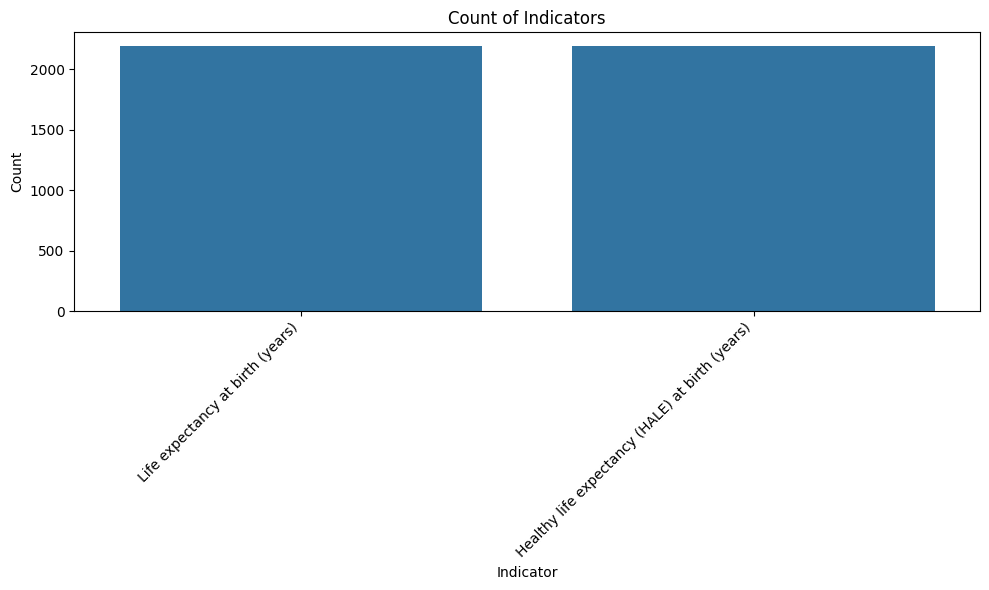

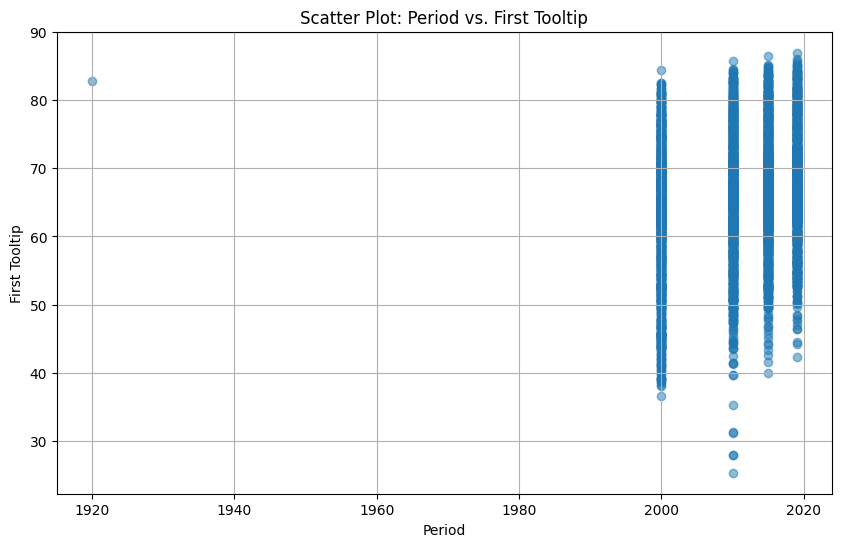

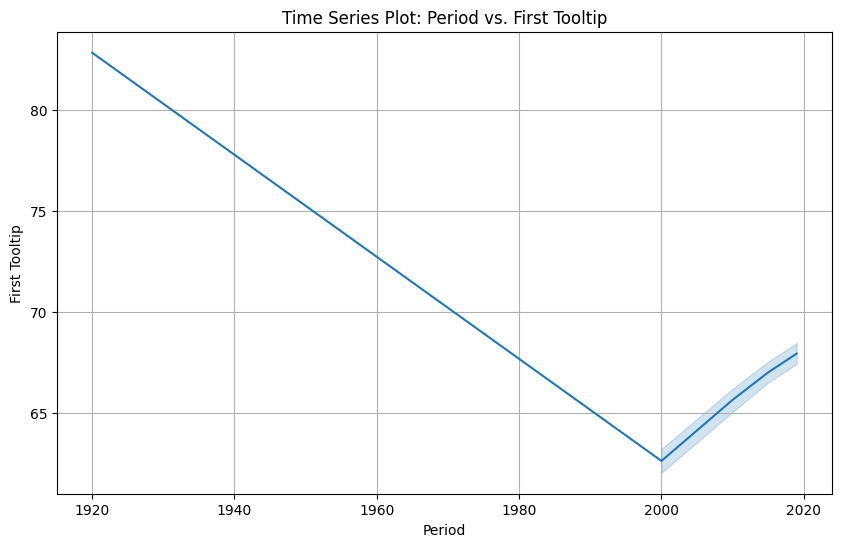

In [24]:
# Histogram for Period
plt.figure(figsize=(10, 6))
plt.hist(merged_life_expectancy['Period'], bins=20, color='skyblue')
plt.xlabel('Period')
plt.ylabel('Frequency')
plt.title('Distribution of Period')
plt.grid(True)
plt.show()

# Histogram for First Tooltip
plt.figure(figsize=(10, 6))
plt.hist(merged_life_expectancy['First Tooltip'], bins=20, color='lightgreen')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)
plt.show()

# Box plot for "First Tooltip" grouped by "Period"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='First Tooltip', data=merged_life_expectancy)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)
plt.show()

# Bar plot for "Indicator" frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='Indicator', data=merged_life_expectancy)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Scatter plot for "Period" vs "First Tooltip"
plt.figure(figsize=(10, 6))
plt.scatter(merged_life_expectancy['Period'], merged_life_expectancy['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')
plt.grid(True)
plt.show()

# Line plot for "Period" vs "First Tooltip" as a time series
plt.figure(figsize=(10, 6))
sns.lineplot(x='Period', y='First Tooltip', data=merged_life_expectancy)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Time Series Plot: Period vs. First Tooltip')
plt.grid(True)
plt.show()





**The first two histograms visualise the frequency distributions of Period and First Tooltip showing Tooltip to be most frequent around 70 and Period around 2019. <br> 
The Boxplot shows possible outliers around 2010 while in 1920 negligible data. <br>
The Scatter plot shows stacked values meaning there are duplicate rows in periods; however, these duplicates have different first tooltips, due to same indicator. Indicator is important for comparison with the rest of the datasets. <br>
The final plot shows a sharp decrease from 1920 till 2000 then starts increasing.**

In [25]:
# The column for which want to detect outliers
data_column = 'First Tooltip'

# Calculate the first and third quartiles (25th and 75th percentiles)
Q1 = merged_life_expectancy[data_column].quantile(0.25)
Q3 = merged_life_expectancy[data_column].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier step
outlier_step = 1.5 * IQR

# Identify outliers
outliers_df = merged_life_expectancy[
    (merged_life_expectancy[data_column] < (Q1 - outlier_step)) |
    (merged_life_expectancy[data_column] > (Q3 + outlier_step))
]

# Print or further analyze the outliers
print("Number of outliers:", len(outliers_df))
print(outliers_df)


Number of outliers: 40
                      Location  Period  \
322                    Burundi    2000   
859                      Haiti    2010   
860                      Haiti    2010   
861                      Haiti    2010   
2243                    Angola    2000   
2458                  Botswana    2000   
2459                  Botswana    2000   
2460                  Botswana    2000   
2518                   Burundi    2000   
2519                   Burundi    2000   
2520                   Burundi    2000   
2576  Central African Republic    2010   
2578  Central African Republic    2000   
2579  Central African Republic    2000   
2580  Central African Republic    2000   
2863                  Eswatini    2010   
2864                  Eswatini    2010   
2866                  Eswatini    2000   
2867                  Eswatini    2000   
3055                     Haiti    2010   
3056                     Haiti    2010   
3057                     Haiti    2010   
3316       

**40 rows of outliers observed in various countries like Burundi, Haiti, Angola, Botswana, Central African Republic, Eswatini, Lesotho, Malawi, Rwanda, Sierra Leone, Uganda, Zambia, and Zimbabwe.<br>
This distribution across different regions suggests that life expectancy outliers are not confined to specific geographic areas. <br>
Explore outlier clusters or patterns across different dimensions (e.g., geographic regions, demographic groups) to uncover meaningful insights into factors affecting life expectancy and health outcomes.**

### Region Expectancy

In [26]:
if merged_region_expectancy is not None:
    print("Merged Region Expectancy Data:")
    print(merged_region_expectancy.head())

Merged Region Expectancy Data:
  Location  Period                         Indicator        Dim1  \
0   Africa    2019  Life expectancy at birth (years)  Both sexes   
1   Africa    2019  Life expectancy at birth (years)        Male   
2   Africa    2019  Life expectancy at birth (years)      Female   
3   Africa    2015  Life expectancy at birth (years)  Both sexes   
4   Africa    2015  Life expectancy at birth (years)        Male   

   First Tooltip  Hale Expectency  Life expectany  Unnamed: 6  \
0          64.49              NaN             NaN         NaN   
1          62.37              NaN             NaN         NaN   
2          66.65              NaN             NaN         NaN   
3          62.56              NaN             NaN         NaN   
4          60.47              NaN             NaN         NaN   

   % OF HALE in life expectancy  
0                           NaN  
1                           NaN  
2                           NaN  
3                           NaN  

 **The dataset includes columns such as Location (region), Period (year), Indicator (life expectancy metric), Dim1 (gender), and First Tooltip (life expectancy value). <br>
 Dim1, Unnamed:6 are irrelevant. <br>
 Must deal with null values.**
 

In [27]:
merged_region_expectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip,Hale Expectency,Life expectany,Unnamed: 6,% OF HALE in life expectancy
0,Africa,2019,Life expectancy at birth (years),Both sexes,64.49,NaN,NaN,NaN,NaN
1,Africa,2019,Life expectancy at birth (years),Male,62.37,NaN,NaN,NaN,NaN
2,Africa,2019,Life expectancy at birth (years),Female,66.65,NaN,NaN,NaN,NaN
3,Africa,2015,Life expectancy at birth (years),Both sexes,62.56,NaN,NaN,NaN,NaN
4,Africa,2015,Life expectancy at birth (years),Male,60.47,NaN,NaN,NaN,NaN


In [28]:
# Check the columns before dropping
print("Columns before dropping:")
print(merged_region_expectancy.columns)

# Drop the 'Unnamed: 6' and dim1  column
merged_region_expectancy.drop(columns=['Unnamed: 6', 'Dim1'], inplace=True)

 #Check the columns after dropping
print("\nColumns after dropping :")
print(merged_region_expectancy.columns)

Columns before dropping:
Index(['Location', 'Period', 'Indicator', 'Dim1', 'First Tooltip',
       'Hale Expectency', 'Life expectany', 'Unnamed: 6',
       '% OF HALE in life expectancy'],
      dtype='object')

Columns after dropping :
Index(['Location', 'Period', 'Indicator', 'First Tooltip', 'Hale Expectency',
       'Life expectany', '% OF HALE in life expectancy'],
      dtype='object')


In [29]:
print(merged_region_expectancy.head)

<bound method NDFrame.head of             Location  Period                                        Indicator  \
0             Africa    2019                 Life expectancy at birth (years)   
1             Africa    2019                 Life expectancy at birth (years)   
2             Africa    2019                 Life expectancy at birth (years)   
3             Africa    2015                 Life expectancy at birth (years)   
4             Africa    2015                 Life expectancy at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)  

In [30]:
print(merged_region_expectancy.dtypes)

Location                         object
Period                            int64
Indicator                        object
First Tooltip                   float64
Hale Expectency                 float64
Life expectany                  float64
% OF HALE in life expectancy    float64
dtype: object


In [31]:
merged_region_expectancy.describe()

,Period,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
count,216.000000,72.000000,144.000000,144.000000,144.000000
mean,2011.000000,70.556806,61.403333,70.556806,87.013889
std,7.122842,6.880156,5.961208,6.856057,1.404220
min,2000.000000,51.060000,45.030000,51.060000,85.000000
25%,2007.500000,66.585000,57.870000,66.585000,86.000000
50%,2012.500000,71.375000,61.665000,71.375000,87.000000
75%,2016.000000,75.525000,66.360000,75.525000,88.000000
max,2019.000000,81.290000,70.240000,81.290000,90.000000


**Since there are null values, will deal with them using imputation instead of drop because they are important to our analysis. <br>
Mean,median, or mode are used but here will use median since the NAs are in continuous variables.<br>
Mean is used in imputation when normally distributed without outliers.<br>
Median when missing values are in continuous variables(float) with skewness and robust to outliers.<br>
Mode when in categorical or discrete variables.**

In [32]:
# Calculate the medians
median_tooltip = 71.375
median_hale = 61.665
median_life = 71.375
median_hale_pct = 87.0

# Fill missing values with medians
merged_region_expectancy['First Tooltip'].fillna(median_tooltip, inplace=True)
merged_region_expectancy['Hale Expectency'].fillna(median_hale, inplace=True)
merged_region_expectancy['Life expectany'].fillna(median_life, inplace=True)
merged_region_expectancy['% OF HALE in life expectancy'].fillna(median_hale_pct, inplace=True)

# Verify that missing values are filled
print(merged_region_expectancy.isnull().sum())


Location                        0
Period                          0
Indicator                       0
First Tooltip                   0
Hale Expectency                 0
Life expectany                  0
% OF HALE in life expectancy    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_21016\2018587319.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_region_expectancy['First Tooltip'].fillna(median_tooltip, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_21016\2018587319.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [33]:
merged_region_expectancy.head()

,Location,Period,Indicator,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
0,Africa,2019,Life expectancy at birth (years),64.49,61.665,71.375,87.0
1,Africa,2019,Life expectancy at birth (years),62.37,61.665,71.375,87.0
2,Africa,2019,Life expectancy at birth (years),66.65,61.665,71.375,87.0
3,Africa,2015,Life expectancy at birth (years),62.56,61.665,71.375,87.0
4,Africa,2015,Life expectancy at birth (years),60.47,61.665,71.375,87.0


#### Check for Duplicate Rows

In [34]:
duplicate_rows = merged_region_expectancy[merged_region_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
            Location  Period                                        Indicator  \
144           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
145           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
146           Africa    2019  Healthy life expectancy (HALE) at birth (years)   
147           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
148           Africa    2015  Healthy life expectancy (HALE) at birth (years)   
..               ...     ...                                              ...   
211  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
212  Western Pacific    2010  Healthy life expectancy (HALE) at birth (years)   
213  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
214  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   
215  Western Pacific    2000  Healthy life expectancy (HALE) at birth (years)   

     First 

In [35]:
# Aggregate duplicates by taking the mean
merged_region_expectancy = merged_region_expectancy.groupby(['Location', 'Period', 'Indicator']).mean().reset_index()

# Print the aggregated dataframe
merged_region_expectancy.head()



,Location,Period,Indicator,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
0,Africa,2000,Healthy life expectancy (HALE) at birth (years),71.375000,45.816667,52.673333,87.0
1,Africa,2000,Life expectancy at birth (years),52.673333,61.665000,71.375000,87.0
2,Africa,2010,Healthy life expectancy (HALE) at birth (years),71.375000,51.803333,59.496667,87.0
3,Africa,2010,Life expectancy at birth (years),59.496667,61.665000,71.375000,87.0
4,Africa,2015,Healthy life expectancy (HALE) at birth (years),71.375000,54.423333,62.573333,87.0


**The columns you are aggregating ("First Tooltip," "Hale Expectancy," etc.) are numerical, continuous variables.<br>
Taking the mean of these values is a standard method to summarize such data, especially when dealing with measurements over time or across regions. <br>
Removed the duplicates to avoid redundancy and reduce dimensionality.**

In [36]:
duplicate_rows = merged_region_expectancy[merged_region_expectancy.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [37]:
merged_region_expectancy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location                      48 non-null     object 
 1   Period                        48 non-null     int64  
 2   Indicator                     48 non-null     object 
 3   First Tooltip                 48 non-null     float64
 4   Hale Expectency               48 non-null     float64
 5   Life expectany                48 non-null     float64
 6   % OF HALE in life expectancy  48 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


In [38]:
merged_region_expectancy.describe()

,Period,First Tooltip,Hale Expectency,Life expectany,% OF HALE in life expectancy
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2011.000000,70.965903,61.534167,70.965903,87.006944
std,7.181537,4.672760,4.175491,4.672760,0.624517
min,2000.000000,52.673333,45.816667,52.673333,86.000000
25%,2007.500000,71.375000,61.615417,71.375000,87.000000
50%,2012.500000,71.375000,61.665000,71.375000,87.000000
75%,2016.000000,71.734167,62.165417,71.734167,87.000000
max,2019.000000,78.206667,68.616667,78.206667,88.666667


#### Visualizations

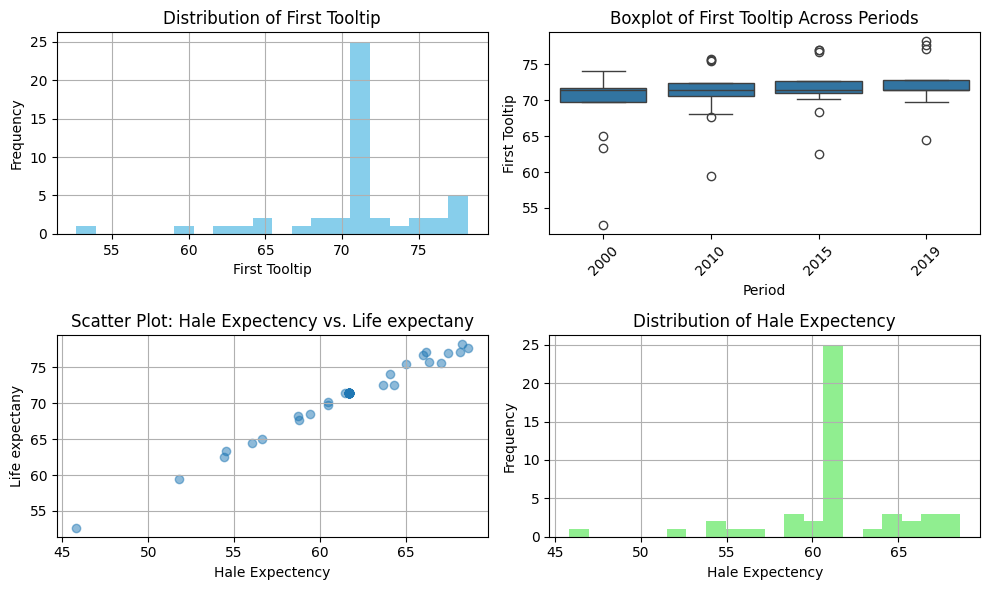

In [39]:

plt.figure(figsize=(10, 6))

# Histogram for First Tooltip
plt.subplot(2, 2, 1)
plt.hist(merged_region_expectancy['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)

# Boxplot for 'First Tooltip' Across Periods
plt.subplot(2, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_region_expectancy)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip Across Periods')
plt.xticks(rotation=45)

# Scatterplot for 'Hale Expectency' vs 'Life expectany'
plt.subplot(2, 2, 3)
plt.scatter(merged_region_expectancy['Hale Expectency'], merged_region_expectancy['Life expectany'], alpha=0.5)
plt.xlabel('Hale Expectency')
plt.ylabel('Life expectany')
plt.title('Scatter Plot: Hale Expectency vs. Life expectany')
plt.grid(True)

# Histogram for 'Hale Expectency'
plt.subplot(2, 2, 4)
plt.hist(merged_region_expectancy['Hale Expectency'], bins=20, color='lightgreen')
plt.xlabel('Hale Expectency')
plt.ylabel('Frequency')
plt.title('Distribution of Hale Expectency')
plt.grid(True)

plt.tight_layout()
plt.show()




**The boxplots show that there are minimal outliers which do not seem to affect. <br>
The scatter plot shows the almost direct relationship, in which as Hale Expectency increases Life expectany increases.<br>
First Tooltip in merged_region_expectancy is highest around 72.**

### Merged Health Services

In [40]:
if merged_health_services is not None:
    print("Merged Health Services Data:")
    print(merged_health_services.head())

Merged Health Services Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Population using at least basic drinking-water...   
1  Afghanistan    2016  Population using at least basic drinking-water...   
2  Afghanistan    2015  Population using at least basic drinking-water...   
3  Afghanistan    2014  Population using at least basic drinking-water...   
4  Afghanistan    2013  Population using at least basic drinking-water...   

   First Tooltip Dim1  
0          57.32  NaN  
1          54.84  NaN  
2          52.39  NaN  
3          49.96  NaN  
4          47.56  NaN  


In [41]:
print(merged_health_services.dtypes)

Location          object
Period             int64
Indicator         object
First Tooltip    float64
Dim1              object
dtype: object


**Location: Geographical location of data collection (e.g., countries or regions).<br>
Period: Time period or year of data recording, providing a temporal context.<br>
Indicator: Specific health metric measured (e.g., "Population using at least basic drinking-water services").<br>
First Tooltip: Numerical value or percentage related to health services.<br>
Dim1 is irrelevant and encoding must be done to categorical variables.**

In [42]:
#location, indicator, dim1 are categorical variables
merged_health_services.describe()

,Period,First Tooltip
count,20959.000000,20959.000000
mean,2008.994275,68.297133
std,5.129152,31.351259
min,2000.000000,0.000000
25%,2005.000000,41.675000
50%,2009.000000,80.950000
75%,2013.000000,96.800000
max,2019.000000,100.000000


In [43]:
# Print the columns in your DataFrame
print(merged_health_services.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_health_services.columns:
    # Drop the 'Dim1' column
    merged_health_services.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_health_services.head()

Index(['Location', 'Period', 'Indicator', 'First Tooltip', 'Dim1'], dtype='object')


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


In [44]:
# Check for missing values 
missing_values_merged_health_services = merged_health_services.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_health_services)


       Location  Period  Indicator  First Tooltip
0         False   False      False          False
1         False   False      False          False
2         False   False      False          False
3         False   False      False          False
4         False   False      False          False
...         ...     ...        ...            ...
20954     False   False      False          False
20955     False   False      False          False
20956     False   False      False          False
20957     False   False      False          False
20958     False   False      False          False

[20959 rows x 4 columns]


In [45]:
merged_health_services.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Population using at least basic drinking-water...,57.32
1,Afghanistan,2016,Population using at least basic drinking-water...,54.84
2,Afghanistan,2015,Population using at least basic drinking-water...,52.39
3,Afghanistan,2014,Population using at least basic drinking-water...,49.96
4,Afghanistan,2013,Population using at least basic drinking-water...,47.56


#### Check for Duplicate Rows

In [46]:
duplicate_rows = merged_health_services[merged_health_services.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
           Location  Period  \
3618        Andorra    2017   
3619        Andorra    2017   
3621        Andorra    2016   
3622        Andorra    2016   
3624        Andorra    2015   
...             ...     ...   
15871     Singapore    2001   
15873     Singapore    2000   
15957         Spain    2014   
18941  Turkmenistan    2017   
18942  Turkmenistan    2017   

                                               Indicator  First Tooltip  
3618   Population using at least basic sanitation ser...         100.00  
3619   Population using at least basic sanitation ser...         100.00  
3621   Population using at least basic sanitation ser...         100.00  
3622   Population using at least basic sanitation ser...         100.00  
3624   Population using at least basic sanitation ser...         100.00  
...                                                  ...            ...  
15871  Population using safely managed sanitation ser...         100.00  
15873  Population u

In [47]:
# Merge duplicate rows by calculating the mean for numerical columns
merged_health_services = merged_health_services.groupby(['Location', 'Period', 'Indicator']).mean().reset_index()

# Display the first few rows of the merged DataFrame
merged_health_services.head()



,Location,Period,Indicator,First Tooltip
0,Afghanistan,2000,Population using at least basic drinking-water...,21.62
1,Afghanistan,2000,Population using at least basic sanitation ser...,24.97
2,Afghanistan,2001,Population using at least basic drinking-water...,21.62
3,Afghanistan,2001,Population using at least basic sanitation ser...,24.97
4,Afghanistan,2002,Population using at least basic drinking-water...,23.60


**Merged them since the duplicates have similarities in period location and indicators. <br>
Used the mean for merging  to retain the overall trends and patterns since 'First Tooltip' appears to represent some measure without losing significant information.**

In [48]:
duplicate_rows = merged_health_services[merged_health_services.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Visualizations 

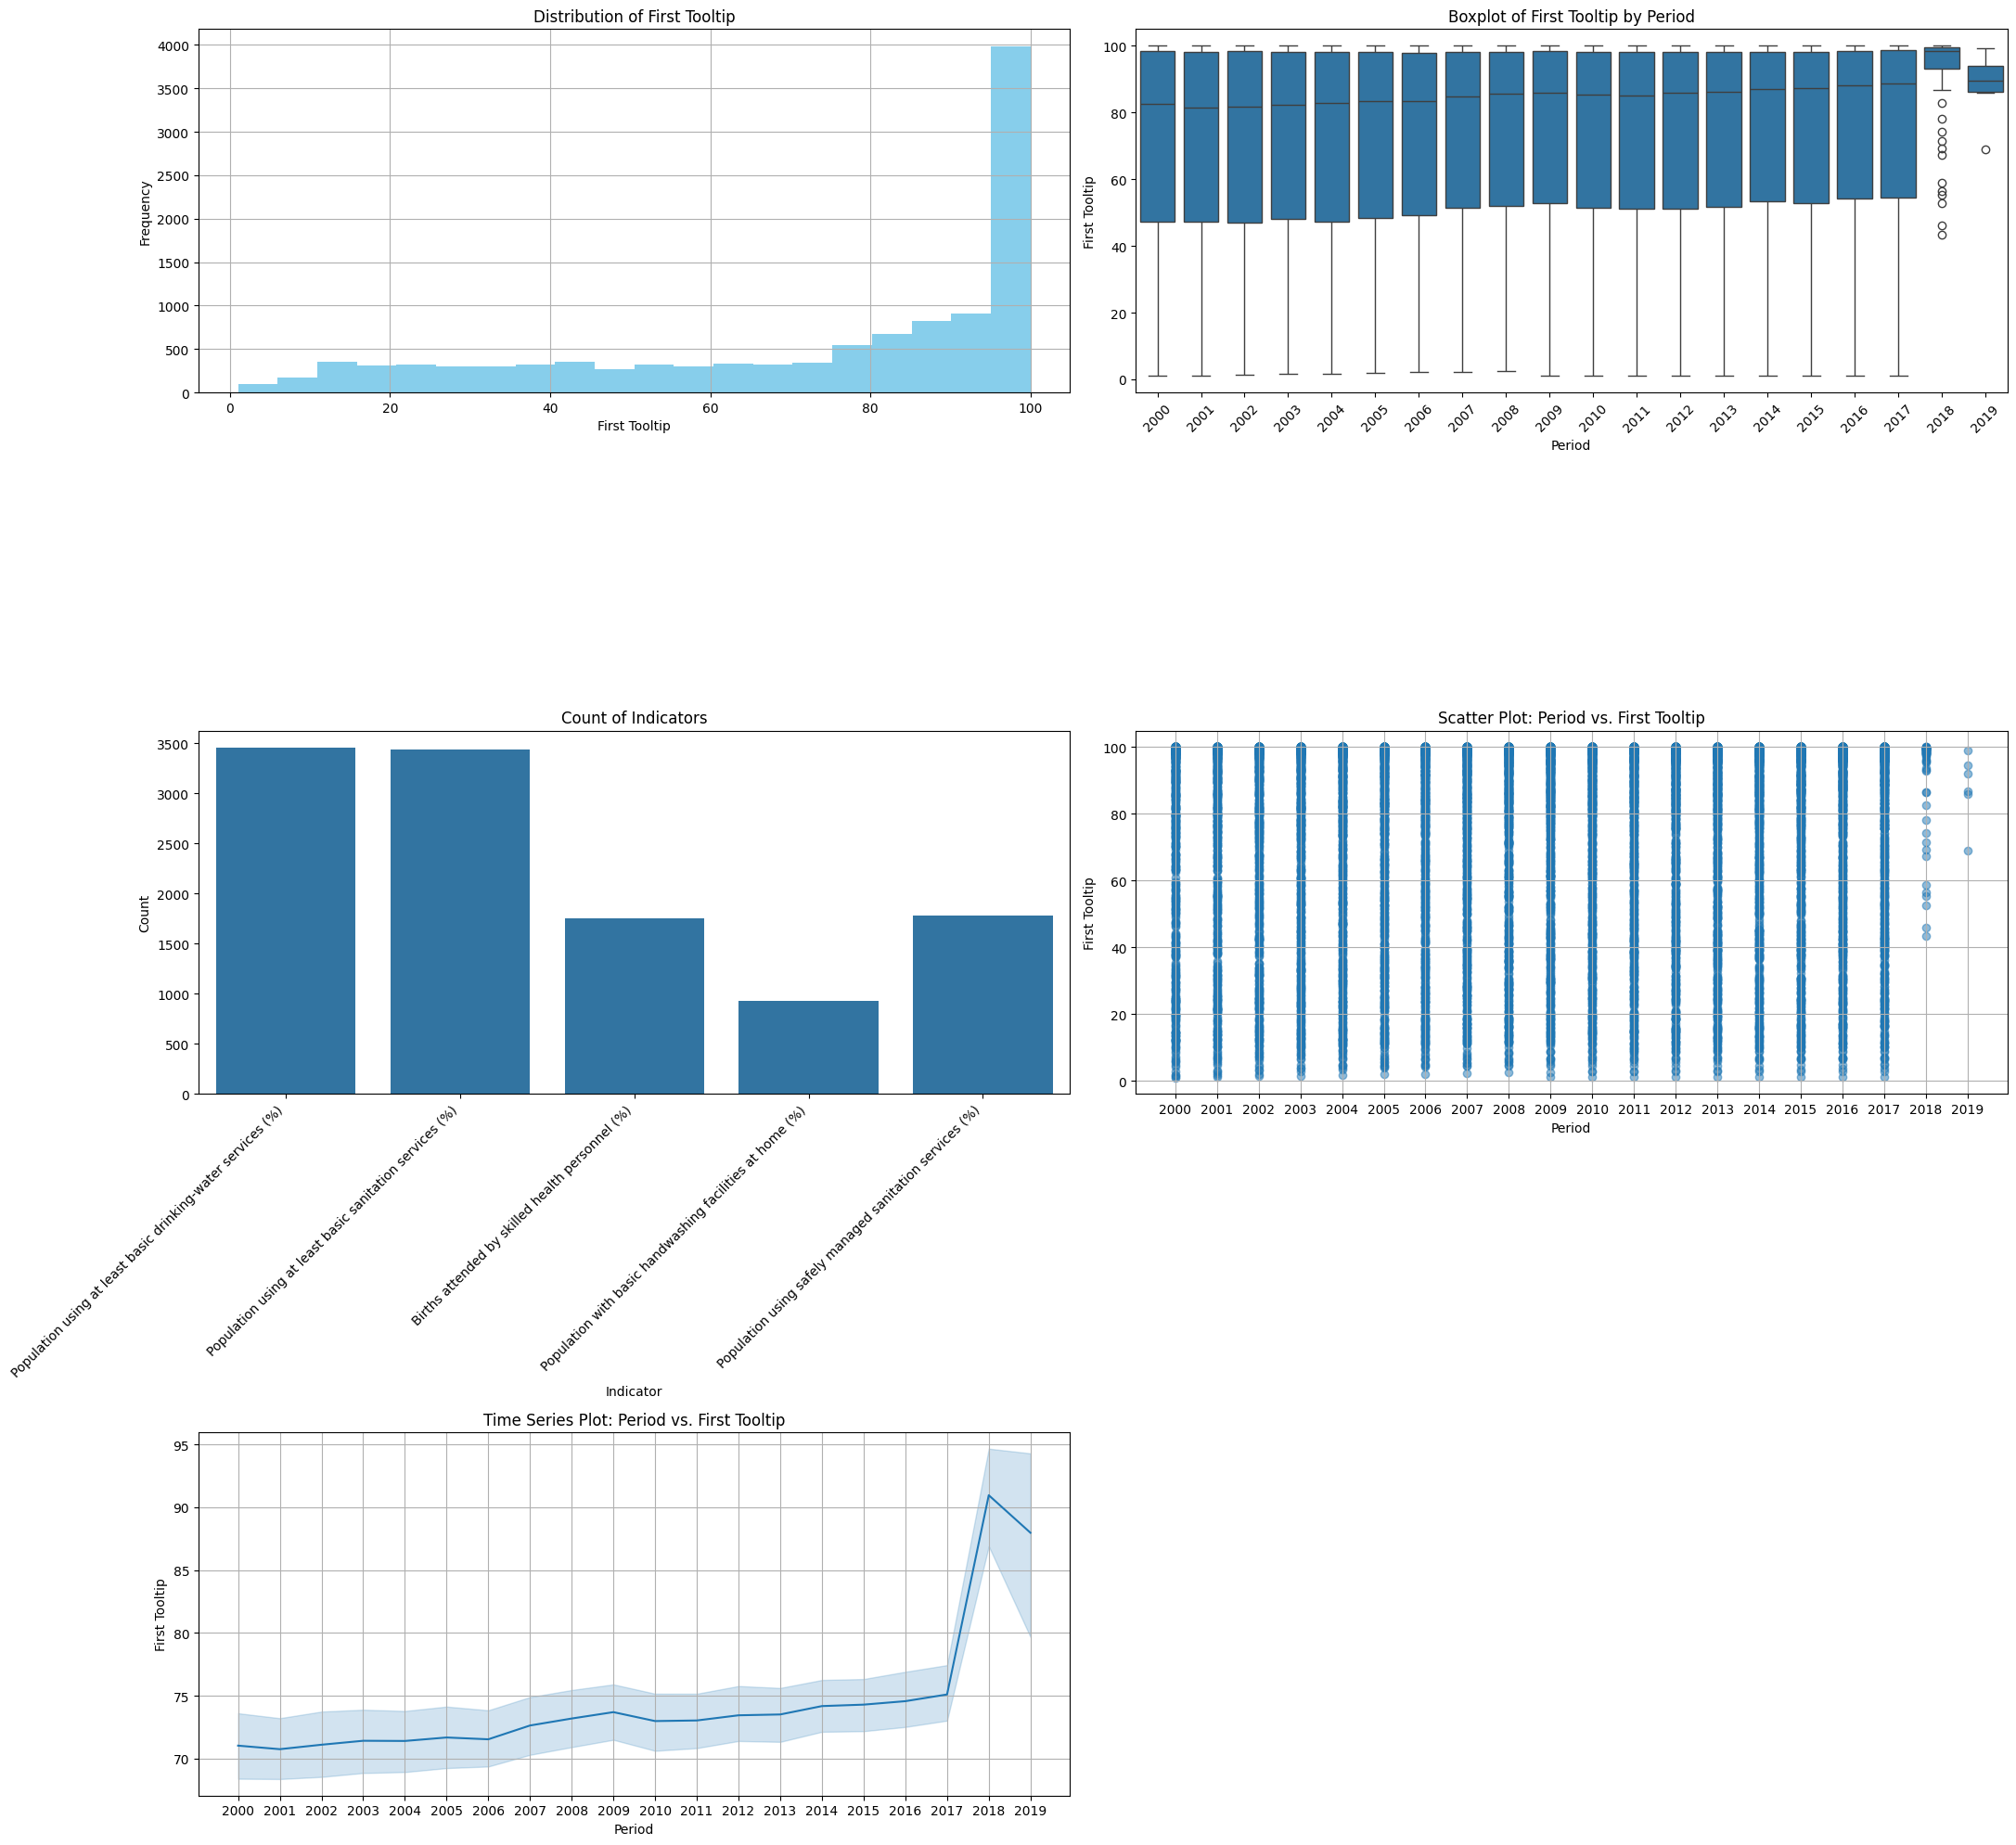

In [49]:
plt.figure(figsize=(22, 20))  
# Histogram for First Tooltip
plt.subplot(3, 2, 1)
plt.hist(merged_health_services['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)

# Box plot for "First Tooltip" grouped by "Period"
plt.subplot(3, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_health_services)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for "Indicator" frequencies
plt.subplot(3, 2, 3)
sns.countplot(x='Indicator', data=merged_health_services)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for "Period" vs "First Tooltip"
plt.subplot(3, 2, 4)
plt.scatter(merged_health_services['Period'].astype(str), merged_health_services['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')
plt.grid(True)

# Line plot for "Period" vs "First Tooltip" as a time series
plt.subplot(3, 2, 5)
sns.lineplot(x=merged_health_services['Period'].astype(str), y='First Tooltip', data=merged_health_services)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Time Series Plot: Period vs. First Tooltip')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


**The bar plot show highest distribution around 90. <br>
Again, the boxplots in merged_health_services don't show much outliers except in 2018 and 2019. <br>
Also there is more variability in the first 25% of the range. As well as increasing median. <br>
The scatter plot shows a positive trend between "Period" and "First Tooltip". This means later periods tend to have higher "First Tooltip" values. 2018 and2019 have fewer observations. <br>
The line plot shows a general increase of Fisrt Tooltip as time increases but at 2018 it starts to decrease.**

### Merged Disease Incidence

In [50]:
if merged_disease_incidence is not None:
    print("Merged Disease Incidence Data:")
    print(merged_disease_incidence.head())

Merged Disease Incidence Data:
      Location                                          Indicator  Period  \
0  Afghanistan  Reported number of people requiring interventi...    2018   
1  Afghanistan  Reported number of people requiring interventi...    2017   
2  Afghanistan  Reported number of people requiring interventi...    2016   
3  Afghanistan  Reported number of people requiring interventi...    2015   
4  Afghanistan  Reported number of people requiring interventi...    2014   

  First Tooltip Dim1  
0      14834701  NaN  
1      14786722  NaN  
2      13275429  NaN  
3      13765392  NaN  
4      13384908  NaN  


In [51]:
# Function to extract numeric values from strings
def extract_numeric(value):
    if isinstance(value, str):
        numeric_part = re.match(r'(\d+)', value)
        if numeric_part:
            return int(numeric_part.group())
    return None

# Function to extract numeric values from range strings
def extract_numeric_range(value):
    if isinstance(value, str):
        numeric_part = re.match(r'(\d+)\s*\[\d+-\d+\]', value)
        if numeric_part:
            return int(numeric_part.group(1))
    return None

# Function to merge CSV files
def merge_csv_files(files):
    dfs = []
    for file in files:
        filepath = os.path.join(directory, file)
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            # Apply extraction logic based on file paths
            if "interventionAgianstNTDs" in file:
                df['First Tooltip'] = df['First Tooltip'].astype(int)  # Direct numeric values
            elif "incedenceOfMalaria" in file or "incedenceOfTuberculosis" in file:
                df['First Tooltip'] = df['First Tooltip'].apply(extract_numeric_range)  # Range format
            else:
                df['First Tooltip'] = df['First Tooltip'].apply(extract_numeric)  # Regular numeric format
            dfs.append(df)
        else:
            print(f"File '{file}' not found.")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        return merged_df
    else:
        return None

# Disease incidence files
disease_incidence_files = ["interventionAgianstNTDs.csv", "incedenceOfMalaria.csv",
                           "incedenceOfTuberculosis.csv", "hepatitusBsurfaceAntigen.csv",
                           "newHivInfections.csv"]

# Example usage
merged_disease_incidence = merge_csv_files(disease_incidence_files)



C:\Users\user\AppData\Local\Temp\ipykernel_21016\2408750484.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dfs, ignore_index=True)


**This code was done because some of the paths consisted of ranges in First Tooltip while others only numbers
So to combine them and convert it into float correctly this was done.**

In [52]:
# Print the columns in your DataFrame
print(merged_disease_incidence.columns)

# Check if 'Dim1' exists in the columns
if 'Dim1' in merged_disease_incidence.columns:
    # Drop the 'Dim1' column
    merged_disease_incidence.drop(columns=['Dim1'], inplace=True)
else:
    print("'Dim1' column not found in DataFrame.")

# Print the updated DataFrame
merged_disease_incidence.head()

Index(['Location', 'Indicator', 'Period', 'First Tooltip', 'Dim1'], dtype='object')


,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701.0
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722.0
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429.0
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392.0
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908.0


**Location: Represents the geographical location or country where the data was collected.<br>
Indicator: Describes the specific metric or category being measured. <br>
Period: Indicates the year when the data was recorded. <br>
First Tooltip: Refers to the actual reported number of people requiring intervention corresponding to the location, indicator, and period.<br>
These columns together provide information about the reported numbers of people requiring intervention across different locations and years, with the indicator specifying the type of intervention or metric being measured.**

In [53]:
merged_disease_incidence.describe()

,Period,First Tooltip
count,10380.000000,6.708000e+03
mean,2010.349229,2.559728e+06
std,5.829804,2.884712e+07
min,2000.000000,0.000000e+00
25%,2005.000000,1.000000e+00
50%,2011.000000,4.600000e+01
75%,2015.000000,3.270000e+02
max,2019.000000,8.460000e+08


In [54]:
print(merged_disease_incidence.dtypes)

Location          object
Indicator         object
Period             int64
First Tooltip    float64
dtype: object


In [55]:
merged_disease_incidence.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Reported number of people requiring interventi...,2018,14834701.0
1,Afghanistan,Reported number of people requiring interventi...,2017,14786722.0
2,Afghanistan,Reported number of people requiring interventi...,2016,13275429.0
3,Afghanistan,Reported number of people requiring interventi...,2015,13765392.0
4,Afghanistan,Reported number of people requiring interventi...,2014,13384908.0


**The weird numbers are due to the large values found in NTDs csv file.**

In [56]:
# Check for missing values 
missing_values_merged_disease_incidence = merged_disease_incidence.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_disease_incidence)


       Location  Indicator  Period  First Tooltip
0         False      False   False          False
1         False      False   False          False
2         False      False   False          False
3         False      False   False          False
4         False      False   False          False
...         ...        ...     ...            ...
10375     False      False   False          False
10376     False      False   False          False
10377     False      False   False          False
10378     False      False   False          False
10379     False      False   False          False

[10380 rows x 4 columns]


#### Check for Duplicate Rows

In [57]:
duplicate_rows = merged_disease_incidence[merged_disease_incidence.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate Rows:
          Location                                          Indicator  Period  \
7831   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7832   Afghanistan  New HIV infections (per 1000 uninfected popula...    2019   
7834   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7835   Afghanistan  New HIV infections (per 1000 uninfected popula...    2015   
7837   Afghanistan  New HIV infections (per 1000 uninfected popula...    2010   
...            ...                                                ...     ...   
10355       Zambia  New HIV infections (per 1000 uninfected popula...    2015   
10358       Zambia  New HIV infections (per 1000 uninfected popula...    2010   
10366     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2019   
10369     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2015   
10376     Zimbabwe  New HIV infections (per 1000 uninfected popula...    2005   

       Firs

In [58]:
# Aggregate duplicates by taking the mean
merged_disease_incidence = merged_disease_incidence.groupby(['Location', 'Period', 'Indicator']).mean().reset_index()

# Print the aggregated dataframe
print(merged_disease_incidence.head())
#groupby(['Location', 'Period', 'Indicator']).mean() groups the DataFrame by the specified columns and calculates the mean for numerical columns in each group.
#.reset_index() resets the index of the DataFrame after aggregation.

      Location  Period                                          Indicator  \
0  Afghanistan    2000  Incidence of tuberculosis (per 100 000 populat...   
1  Afghanistan    2000   Malaria incidence (per 1 000 population at risk)   
2  Afghanistan    2000  New HIV infections (per 1000 uninfected popula...   
3  Afghanistan    2001  Incidence of tuberculosis (per 100 000 populat...   
4  Afghanistan    2001   Malaria incidence (per 1 000 population at risk)   

   First Tooltip  
0          190.0  
1            NaN  
2            0.0  
3          189.0  
4            NaN  


In [59]:
duplicate_rows = merged_disease_incidence[merged_disease_incidence.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Visualizations

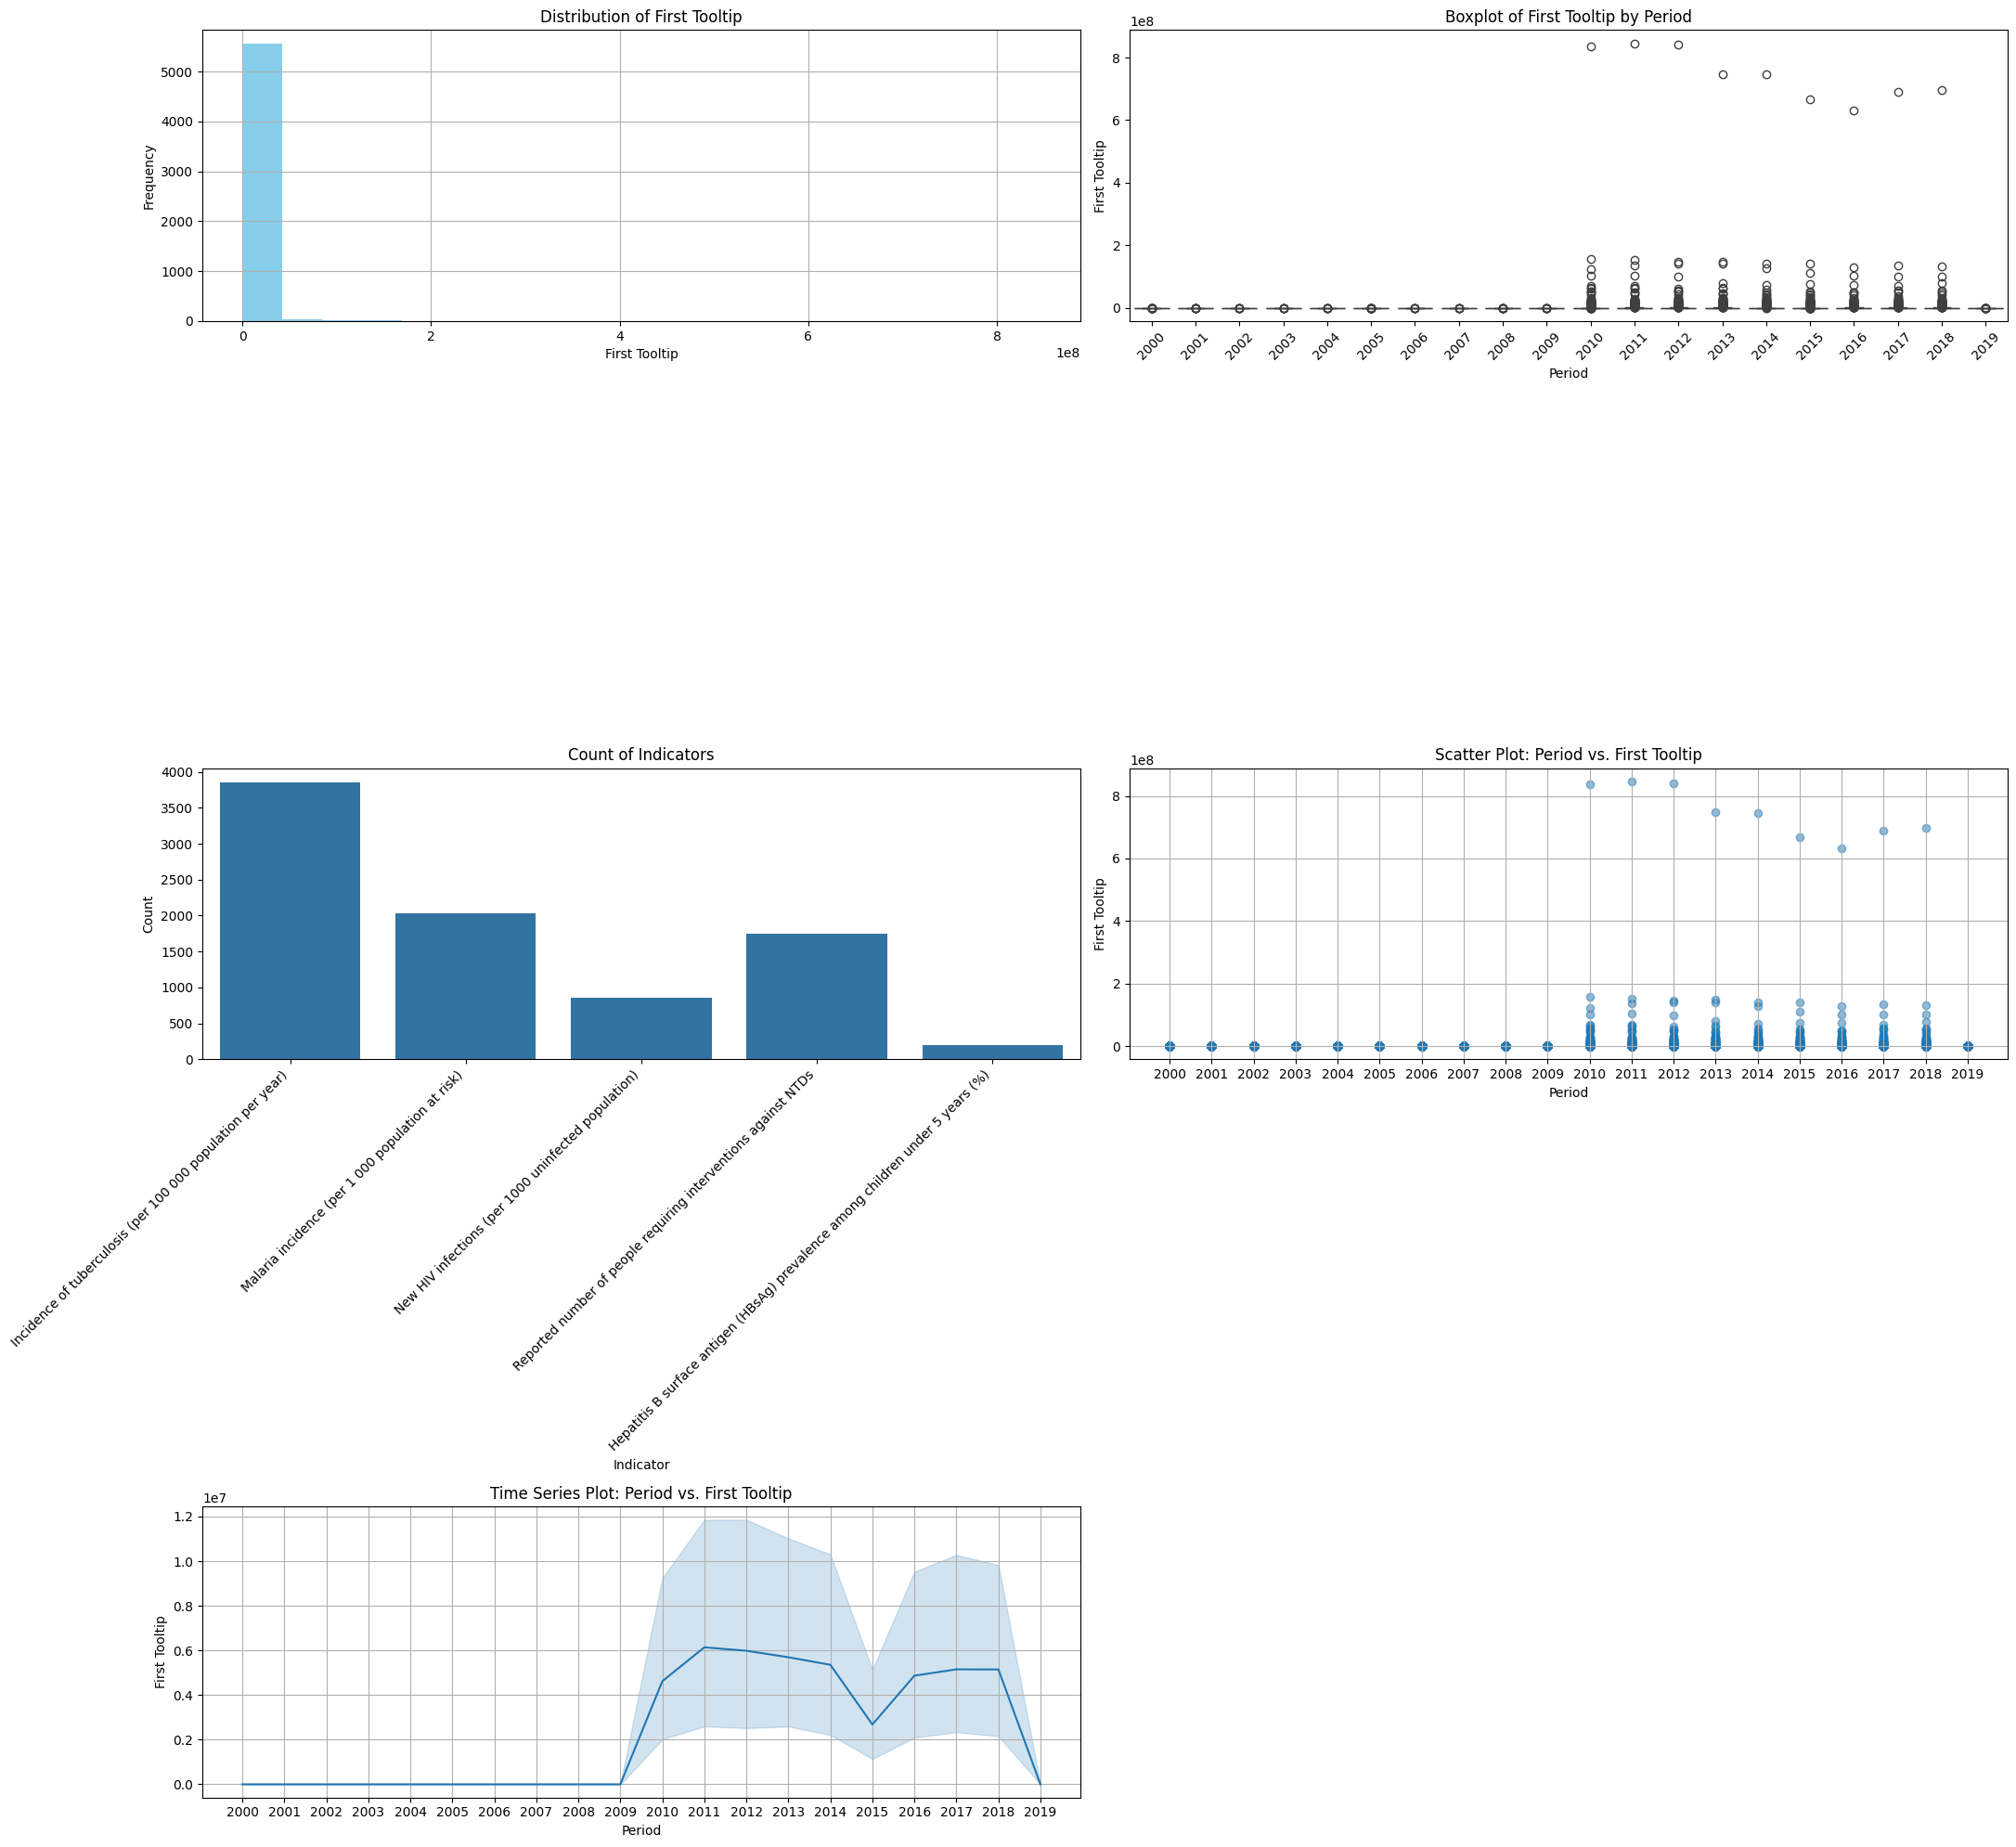

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 20))  

# Histogram for First Tooltip
plt.subplot(3, 2, 1)
plt.hist(merged_disease_incidence['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')
plt.grid(True)

# Box plot for "First Tooltip" grouped by "Period"
plt.subplot(3, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_disease_incidence)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for "Indicator" frequencies
plt.subplot(3, 2, 3)
sns.countplot(x='Indicator', data=merged_disease_incidence)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for "Period" vs "First Tooltip"
plt.subplot(3, 2, 4)
plt.scatter(merged_disease_incidence['Period'].astype(str), merged_disease_incidence['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')
plt.grid(True)

# Line plot for "Period" vs "First Tooltip" as a time series
plt.subplot(3, 2, 5)
sns.lineplot(x=merged_disease_incidence['Period'].astype(str), y='First Tooltip', data=merged_disease_incidence)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Time Series Plot: Period vs. First Tooltip')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [61]:
# Calculate quartiles and IQR
Q1 = merged_disease_incidence['First Tooltip'].quantile(0.25)
Q3 = merged_disease_incidence['First Tooltip'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = merged_disease_incidence[(merged_disease_incidence['First Tooltip'] < lower_bound) | (merged_disease_incidence['First Tooltip'] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
         Location  Period                                          Indicator  \
25    Afghanistan    2010  Reported number of people requiring interventi...   
28    Afghanistan    2011  Reported number of people requiring interventi...   
31    Afghanistan    2012  Reported number of people requiring interventi...   
34    Afghanistan    2013  Reported number of people requiring interventi...   
37    Afghanistan    2014  Reported number of people requiring interventi...   
...           ...     ...                                                ...   
8663     Zimbabwe    2014  Reported number of people requiring interventi...   
8668     Zimbabwe    2015  Reported number of people requiring interventi...   
8671     Zimbabwe    2016  Reported number of people requiring interventi...   
8674     Zimbabwe    2017  Reported number of people requiring interventi...   
8677     Zimbabwe    2018  Reported number of people requiring interventi...   

      First Tooltip  
25     



**The Boxplots show great number of outliers, and after printing number of outliers= 1132 rows.<br>
However the NTDs file consists of huge values of First Tooltip compared to the rest, thus the great number of outliers. <br>
NTDs is important for our analysis, so further measures might be needed. <br>
The "W" shape in a time series plot can represent seasonal or cyclical patterns, anomalies, or errors in the data which is probably due to the NTDs csv file.**


### Maternal Health

In [62]:
if merged_maternal_health is not None:
    print("Merged Maternal Health Data:")
    print(merged_maternal_health.head())

Merged Maternal Health Data:
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Maternal mortality ratio (per 100 000 live bir...   
1  Afghanistan    2016  Maternal mortality ratio (per 100 000 live bir...   
2  Afghanistan    2015  Maternal mortality ratio (per 100 000 live bir...   
3  Afghanistan    2014  Maternal mortality ratio (per 100 000 live bir...   
4  Afghanistan    2013  Maternal mortality ratio (per 100 000 live bir...   

    First Tooltip  
0  638 [427-1010]  
1  673 [457-1040]  
2  701 [501-1020]  
3  786 [592-1080]  
4  810 [617-1080]  


In [63]:
print(merged_maternal_health.columns)

Index(['Location', 'Period', 'Indicator', 'First Tooltip'], dtype='object')


In [64]:
merged_maternal_health.describe()


,Period
count,3294.000000
mean,2008.500000
std,5.188915
min,2000.000000
25%,2004.000000
50%,2008.500000
75%,2013.000000
max,2017.000000


In [65]:
print(merged_maternal_health.dtypes)

Location         object
Period            int64
Indicator        object
First Tooltip    object
dtype: object


In [66]:
# Preprocess 'First Tooltip' column
def extract_numeric(value):
    # Extract numeric part from the string using regex
    numeric_part = re.search(r'\d+', value)
    if numeric_part:
        return float(numeric_part.group())
    else:
        return None

# Apply the extract_numeric function to 'First Tooltip' column
merged_maternal_health['First Tooltip'] = merged_maternal_health['First Tooltip'].apply(extract_numeric)

print(merged_maternal_health.dtypes)
print(merged_maternal_health.head())

Location          object
Period             int64
Indicator         object
First Tooltip    float64
dtype: object
      Location  Period                                          Indicator  \
0  Afghanistan    2017  Maternal mortality ratio (per 100 000 live bir...   
1  Afghanistan    2016  Maternal mortality ratio (per 100 000 live bir...   
2  Afghanistan    2015  Maternal mortality ratio (per 100 000 live bir...   
3  Afghanistan    2014  Maternal mortality ratio (per 100 000 live bir...   
4  Afghanistan    2013  Maternal mortality ratio (per 100 000 live bir...   

   First Tooltip  
0          638.0  
1          673.0  
2          701.0  
3          786.0  
4          810.0  


In [67]:
# Check for missing values 
missing_values_merged_maternal_health= merged_maternal_health.isnull()

# Print the DataFrame with missing value indicators
print(missing_values_merged_maternal_health)


      Location  Period  Indicator  First Tooltip
0        False   False      False          False
1        False   False      False          False
2        False   False      False          False
3        False   False      False          False
4        False   False      False          False
...        ...     ...        ...            ...
3289     False   False      False          False
3290     False   False      False          False
3291     False   False      False          False
3292     False   False      False          False
3293     False   False      False          False

[3294 rows x 4 columns]


#### Check for Duplicate Rows

In [68]:
duplicate_rows = merged_maternal_health[merged_maternal_health.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [69]:
merged_maternal_health.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638.0
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673.0
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701.0
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786.0
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810.0


#### Visualizations

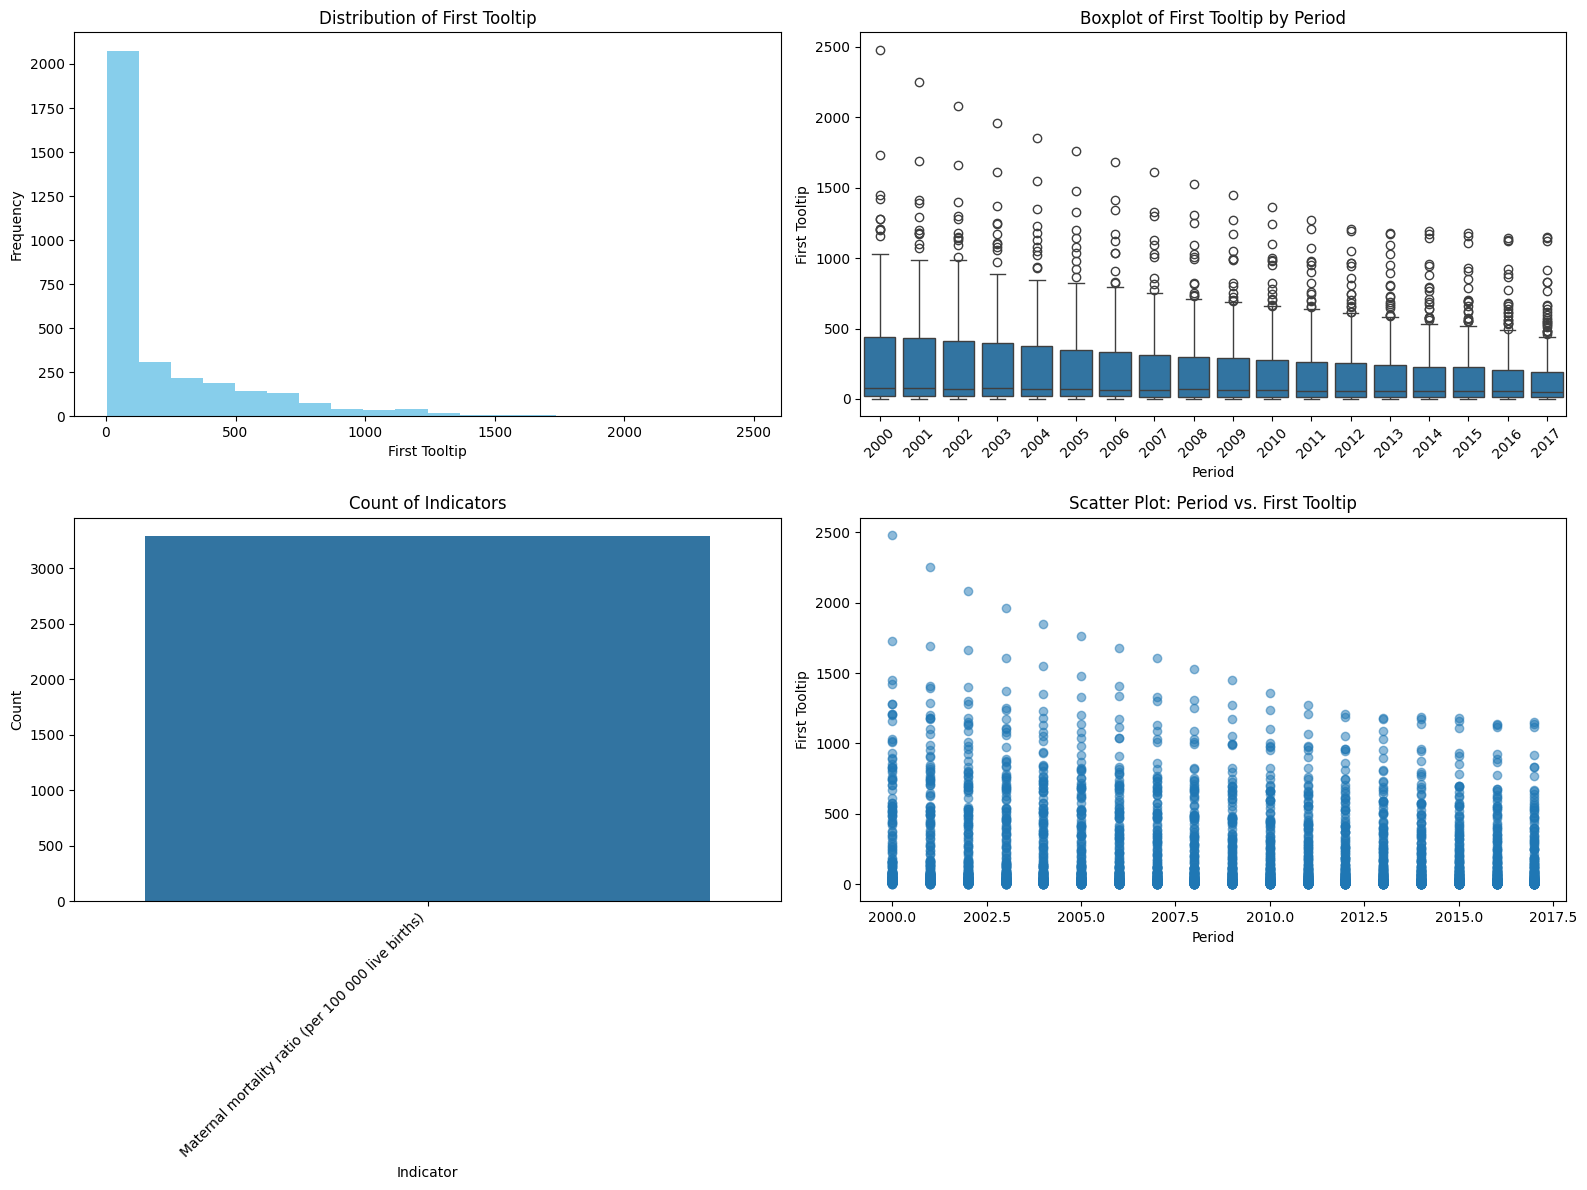

In [70]:
plt.figure(figsize=(16, 12))

# Histogram for 'First Tooltip'
plt.subplot(2, 2, 1)
plt.hist(merged_maternal_health['First Tooltip'], bins=20, color='skyblue')
plt.xlabel('First Tooltip')
plt.ylabel('Frequency')
plt.title('Distribution of First Tooltip')

# Box plot for 'First Tooltip' grouped by 'Period'
plt.subplot(2, 2, 2)
sns.boxplot(x='Period', y='First Tooltip', data=merged_maternal_health)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Boxplot of First Tooltip by Period')
plt.xticks(rotation=45)

# Bar plot for 'Indicator' frequencies
plt.subplot(2, 2, 3)
sns.countplot(x='Indicator', data=merged_maternal_health)
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.title('Count of Indicators')
plt.xticks(rotation=45, ha='right')

# Scatter plot for 'Period' vs 'First Tooltip'
plt.subplot(2, 2, 4)
plt.scatter(merged_maternal_health['Period'], merged_maternal_health['First Tooltip'], alpha=0.5)
plt.xlabel('Period')
plt.ylabel('First Tooltip')
plt.title('Scatter Plot: Period vs. First Tooltip')

# Adjust layout
plt.tight_layout()
plt.show()


In [71]:
# Calculate the first and third quartiles
Q1 = merged_maternal_health['First Tooltip'].quantile(0.25)
Q3 = merged_maternal_health['First Tooltip'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
outliers = merged_maternal_health[(merged_maternal_health['First Tooltip'] < lower_bound) |
                                  (merged_maternal_health['First Tooltip'] > upper_bound)]

# Print the outliers
print("Outliers in 'First Tooltip' column:")
print(outliers)


Outliers in 'First Tooltip' column:
                         Location  Period  \
3                     Afghanistan    2014   
4                     Afghanistan    2013   
5                     Afghanistan    2012   
6                     Afghanistan    2011   
7                     Afghanistan    2010   
...                           ...     ...   
3127  United Republic of Tanzania    2004   
3128  United Republic of Tanzania    2003   
3129  United Republic of Tanzania    2002   
3130  United Republic of Tanzania    2001   
3131  United Republic of Tanzania    2000   

                                              Indicator  First Tooltip  
3     Maternal mortality ratio (per 100 000 live bir...          786.0  
4     Maternal mortality ratio (per 100 000 live bir...          810.0  
5     Maternal mortality ratio (per 100 000 live bir...          858.0  
6     Maternal mortality ratio (per 100 000 live bir...          905.0  
7     Maternal mortality ratio (per 100 000 live bir...   

**There are outliers in the boxplot as well as a decrease in ranges and median.<br>
The scatter plots also show a negative weak correlation.**

### Encoding 


#### Indicator

In [72]:
# Initialize LabelEncoders for each DataFrame
label_encoder_health = LabelEncoder()
label_encoder_region = LabelEncoder()
label_encoder_life = LabelEncoder()
label_encoder_disease = LabelEncoder()
label_encoder_maternal = LabelEncoder()
label_encoder_mortality = LabelEncoder()

# Apply label encoding to 'Indicator' column in each DataFrame
merged_health_services['Indicator_encoded'] = label_encoder_health.fit_transform(merged_health_services['Indicator'])
merged_region_expectancy['Indicator_encoded'] = label_encoder_region.fit_transform(merged_region_expectancy['Indicator'])
merged_life_expectancy['Indicator_encoded'] = label_encoder_life.fit_transform(merged_life_expectancy['Indicator'])
merged_disease_incidence['Indicator_encoded'] = label_encoder_disease.fit_transform(merged_disease_incidence['Indicator'])
merged_maternal_health['Indicator_encoded'] = label_encoder_maternal.fit_transform(merged_maternal_health['Indicator'])
merged_mortality['Indicator_encoded'] = label_encoder_mortality.fit_transform(merged_mortality['Indicator'])

# Print unique indicators and encoded values for verification
print("Unique Indicators and Encoded Values in merged_health_services:")
print(merged_health_services[['Indicator', 'Indicator_encoded']].drop_duplicates())

print("\nUnique Indicators and Encoded Values in merged_region_expectancy:")
print(merged_region_expectancy[['Indicator', 'Indicator_encoded']].drop_duplicates())

print("\nUnique Indicators and Encoded Values in merged_mortality:")
print(merged_mortality[['Indicator', 'Indicator_encoded']].drop_duplicates())

# Repeat for other DataFrames


Unique Indicators and Encoded Values in merged_health_services:
                                            Indicator  Indicator_encoded
0   Population using at least basic drinking-water...                  1
1   Population using at least basic sanitation ser...                  2
6     Births attended by skilled health personnel (%)                  0
13  Population with basic handwashing facilities a...                  4
59  Population using safely managed sanitation ser...                  3

Unique Indicators and Encoded Values in merged_region_expectancy:
                                         Indicator  Indicator_encoded
0  Healthy life expectancy (HALE) at birth (years)                  0
1                 Life expectancy at birth (years)                  1

Unique Indicators and Encoded Values in merged_mortality:
                                               Indicator  Indicator_encoded
0      Infant mortality rate (probability of dying be...                  1
29999  Und

#### Location

In [73]:
# Initialize LabelEncoders for each DataFrame
label_encoder_location_health = LabelEncoder()
label_encoder_location_region = LabelEncoder()
label_encoder_location_life = LabelEncoder()
label_encoder_location_disease = LabelEncoder()
label_encoder_location_maternal = LabelEncoder()
label_encoder_location_mortality = LabelEncoder()

# Apply label encoding to 'Location' column in each DataFrame
merged_health_services['Location_encoded'] = label_encoder_location_health.fit_transform(merged_health_services['Location'])
merged_region_expectancy['Location_encoded'] = label_encoder_location_region.fit_transform(merged_region_expectancy['Location'])
merged_life_expectancy['Location_encoded'] = label_encoder_location_life.fit_transform(merged_life_expectancy['Location'])
merged_disease_incidence['Location_encoded'] = label_encoder_location_disease.fit_transform(merged_disease_incidence['Location'])
merged_maternal_health['Location_encoded'] = label_encoder_location_maternal.fit_transform(merged_maternal_health['Location'])
merged_mortality['Location_encoded'] = label_encoder_location_mortality.fit_transform(merged_mortality['Location'])

# Print encoded values for verification (example for merged_health_services)
print(merged_health_services[['Location', 'Location_encoded']].head())
print(merged_health_services[['Location', 'Location_encoded']].tail())


      Location  Location_encoded
0  Afghanistan                 0
1  Afghanistan                 0
2  Afghanistan                 0
3  Afghanistan                 0
4  Afghanistan                 0
       Location  Location_encoded
11354  Zimbabwe               195
11355  Zimbabwe               195
11356  Zimbabwe               195
11357  Zimbabwe               195
11358  Zimbabwe               195


## Data Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_21016\3676497649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_health_services, x='Indicator_encoded', palette='viridis')


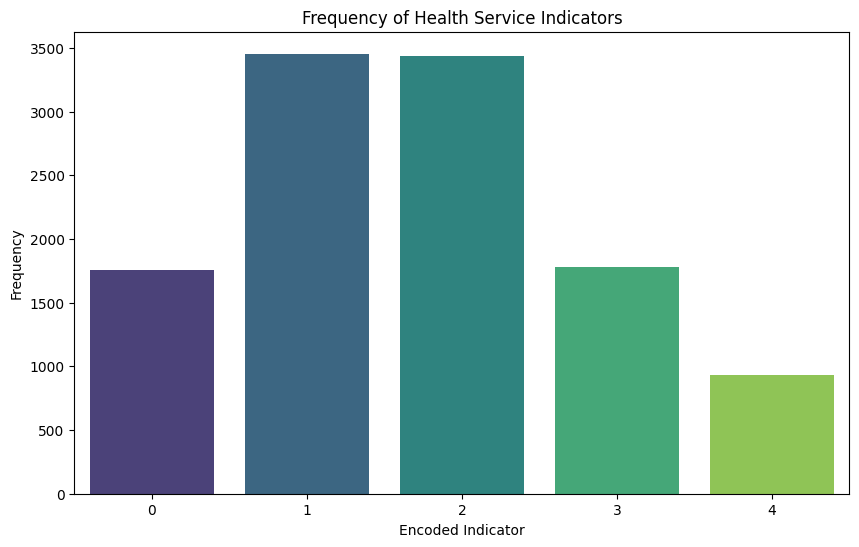

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_health_services, x='Indicator_encoded', palette='viridis')
plt.xlabel('Encoded Indicator')
plt.ylabel('Frequency')
plt.title('Frequency of Health Service Indicators')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21016\1596156967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_health_services, x='Period', y='Indicator_encoded', palette='Set3')


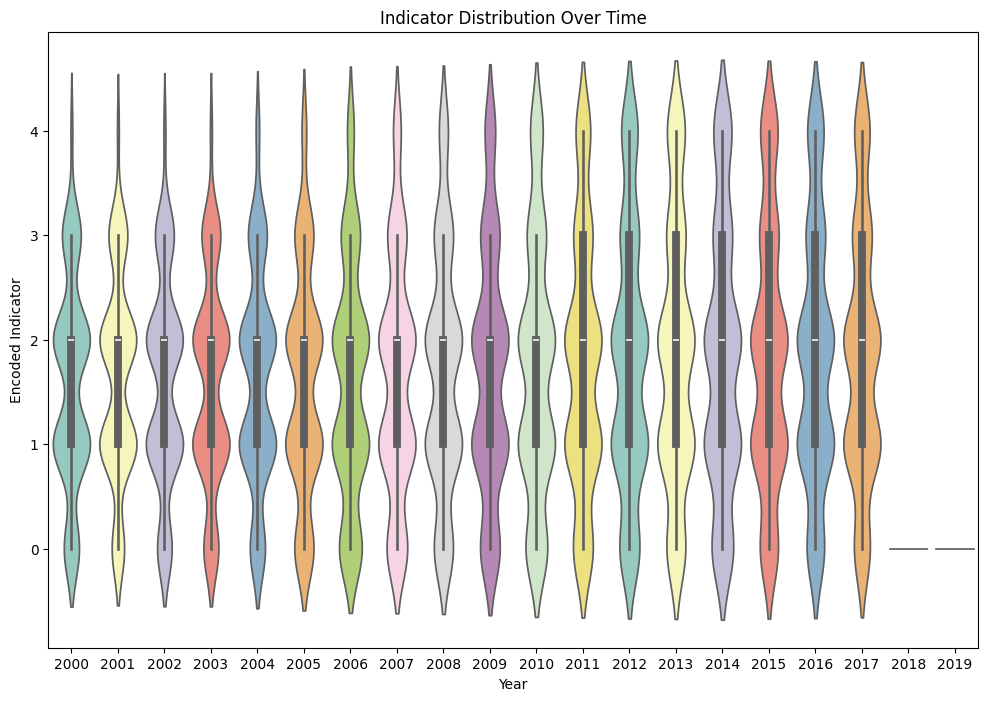

In [75]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_health_services, x='Period', y='Indicator_encoded', palette='Set3')
plt.xlabel('Year')
plt.ylabel('Encoded Indicator')
plt.title('Indicator Distribution Over Time')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21016\1030691191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_mortality, x='Period', y='First Tooltip', palette='viridis')


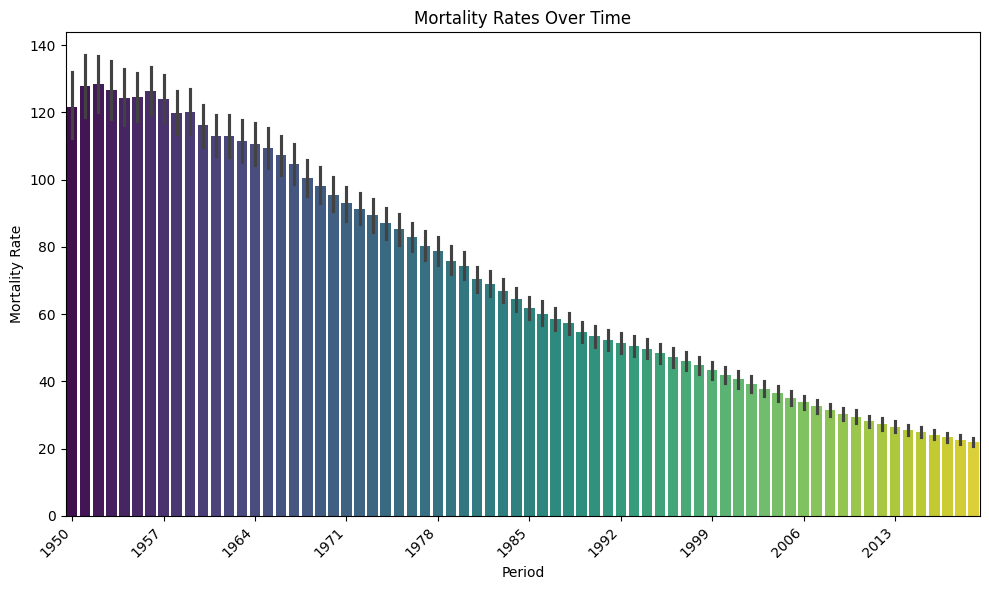

In [76]:
# Calculate the number of periods and set the tick frequency
num_periods = merged_mortality['Period'].nunique()
tick_frequency = max(1, num_periods // 10)  # Adjust tick frequency as needed

plt.figure(figsize=(10, 6))
sns.barplot(data=merged_mortality, x='Period', y='First Tooltip', palette='viridis')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rates Over Time')
plt.xticks(np.arange(0, num_periods, tick_frequency), rotation=45, ha='right')  # Specify tick locations and adjust rotation
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21016\504656264.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=merged_mortality, x='Period', y='First Tooltip', estimator='mean', ci='sd', color='skyblue')


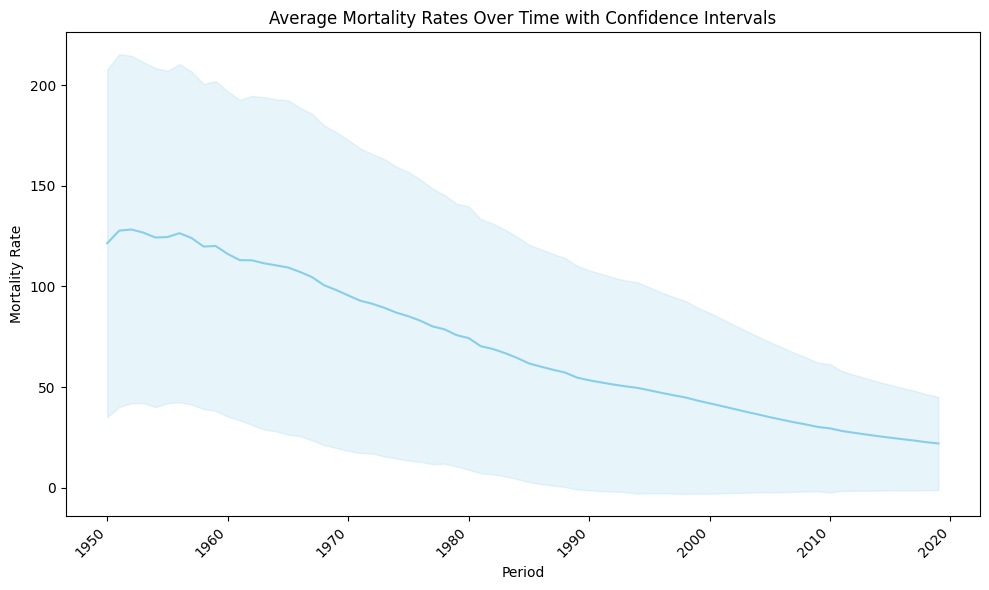

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_mortality, x='Period', y='First Tooltip', estimator='mean', ci='sd', color='skyblue')
plt.xlabel('Period')
plt.ylabel('Mortality Rate')
plt.title('Average Mortality Rates Over Time with Confidence Intervals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21016\3203347312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_mortality, x='Decade', y='First Tooltip', palette='viridis')


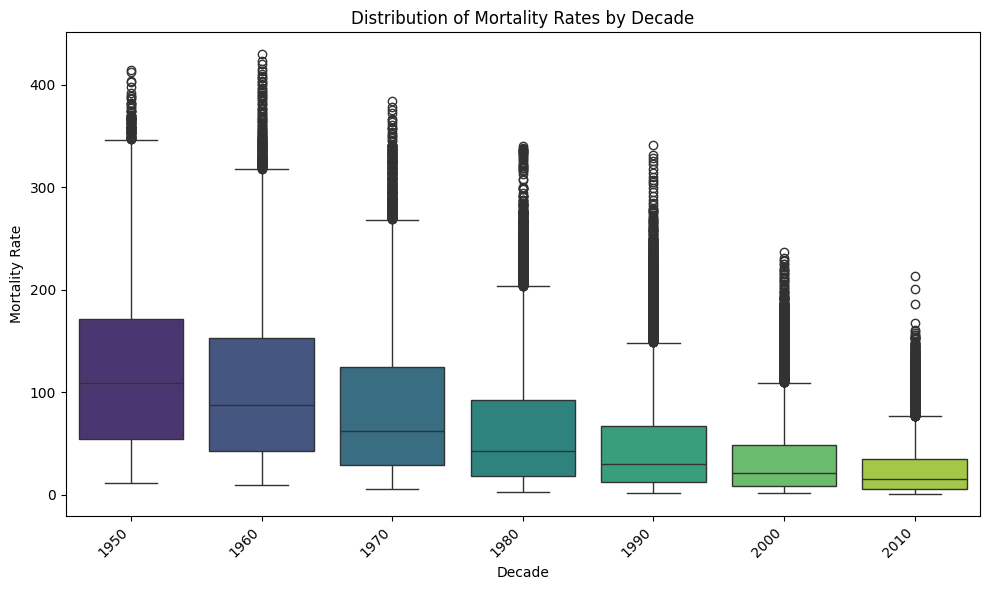

In [78]:
# Extract decade from period
merged_mortality['Decade'] = (merged_mortality['Period'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_mortality, x='Decade', y='First Tooltip', palette='viridis')
plt.xlabel('Decade')
plt.ylabel('Mortality Rate')
plt.title('Distribution of Mortality Rates by Decade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21016\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


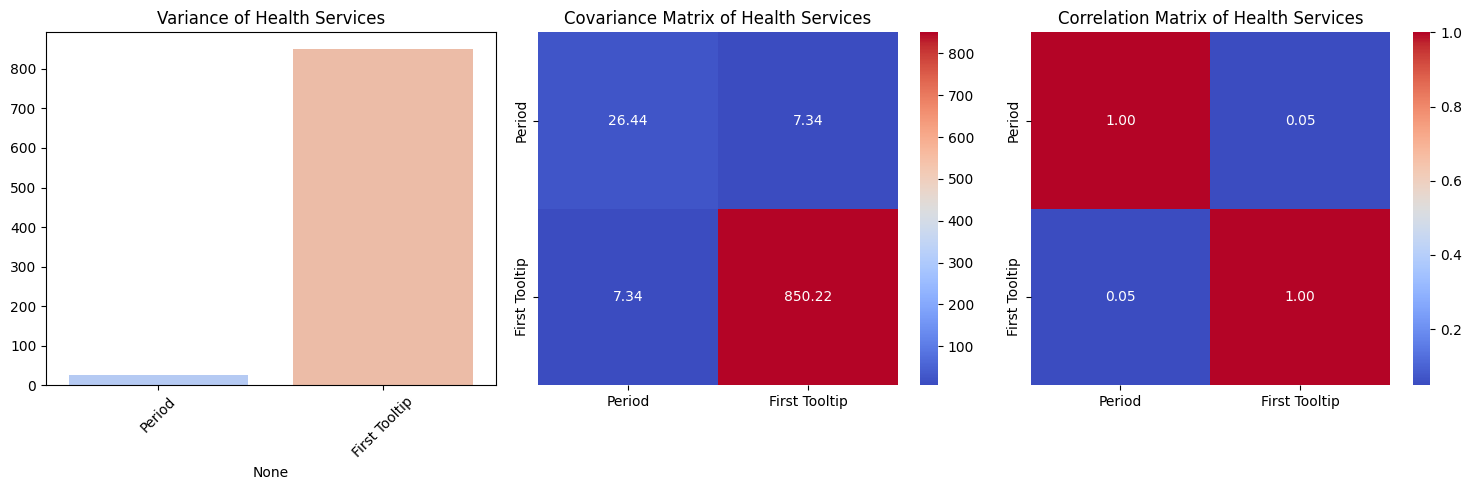

C:\Users\user\AppData\Local\Temp\ipykernel_21016\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


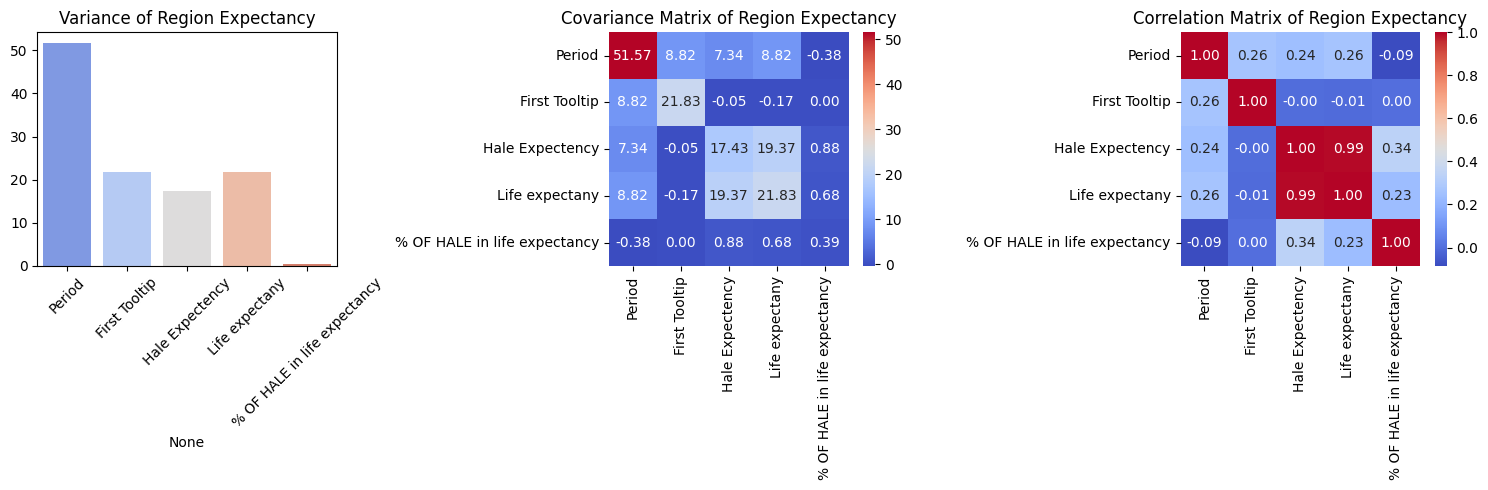

C:\Users\user\AppData\Local\Temp\ipykernel_21016\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


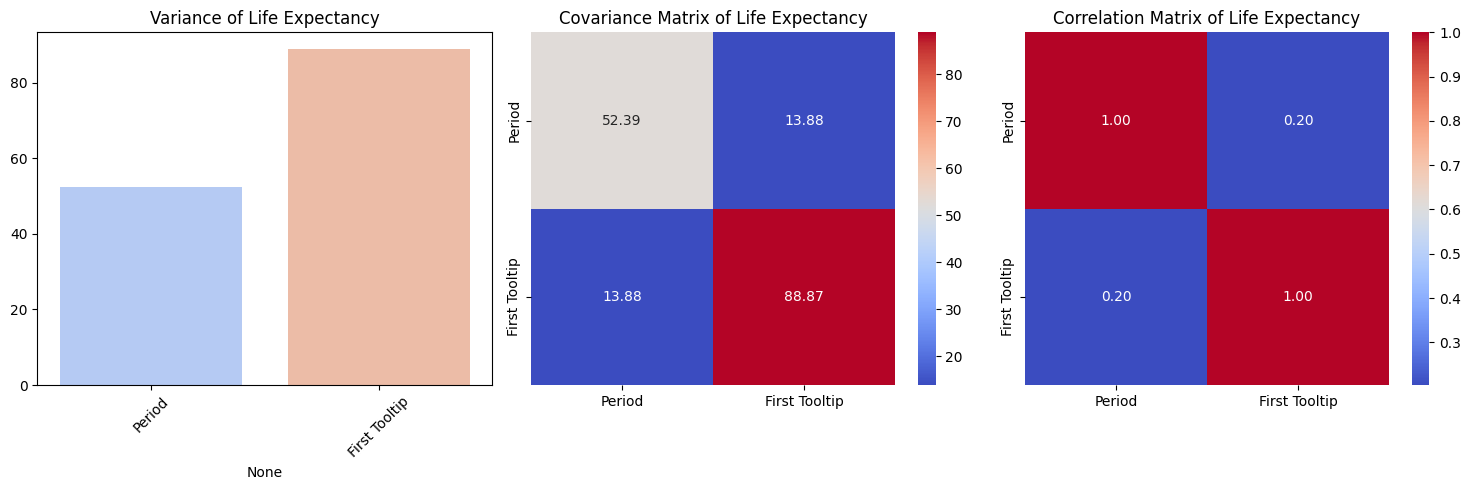

C:\Users\user\AppData\Local\Temp\ipykernel_21016\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


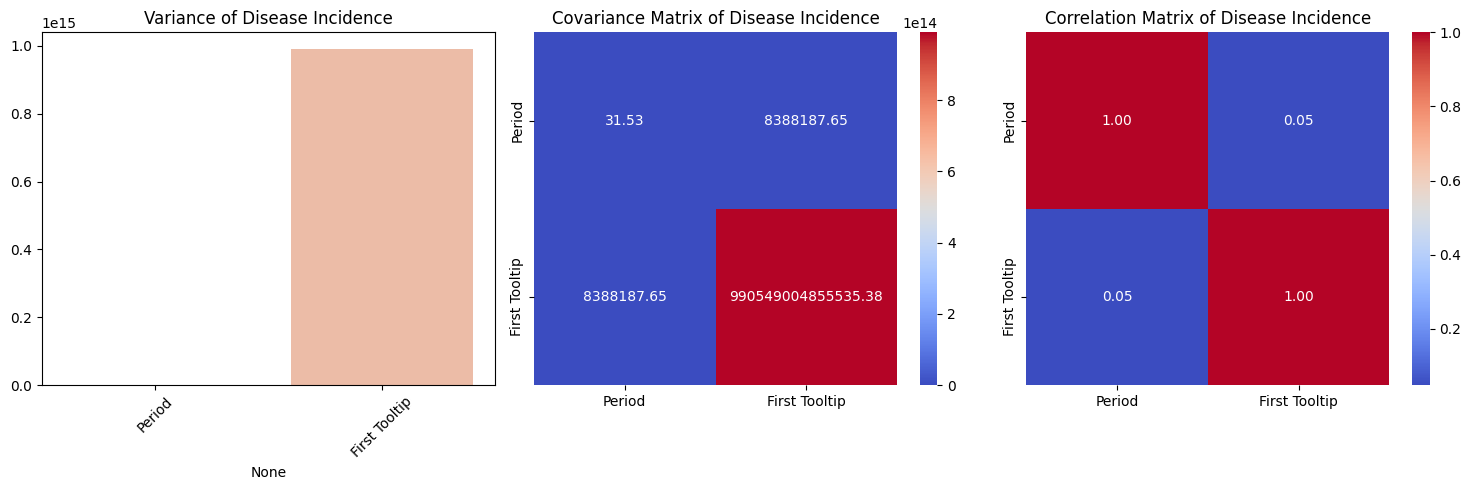

C:\Users\user\AppData\Local\Temp\ipykernel_21016\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


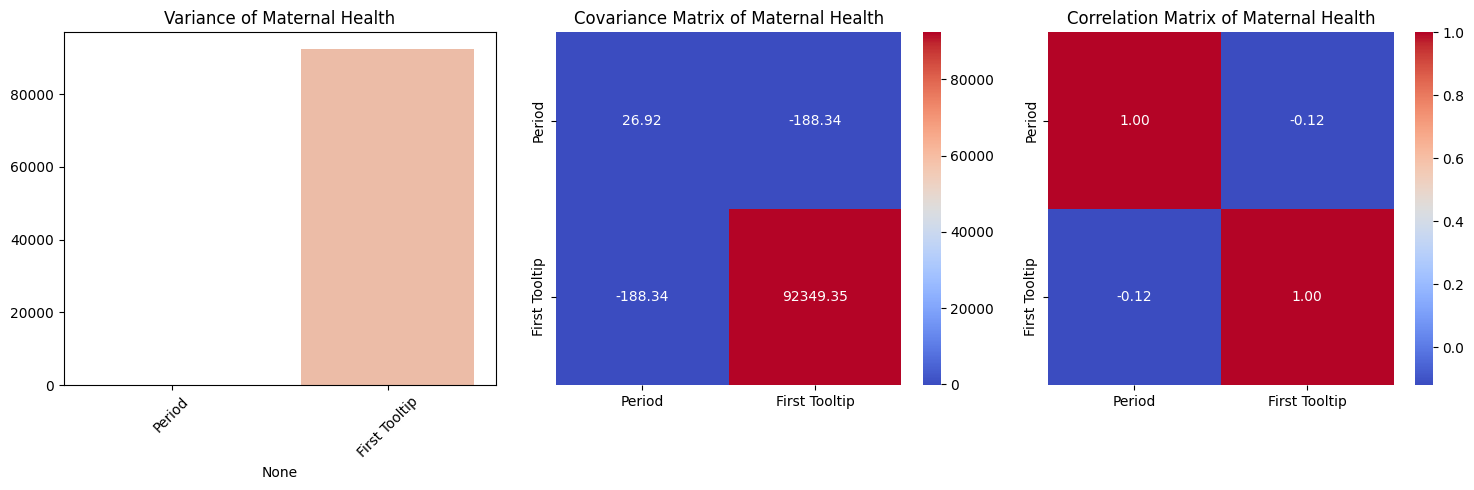

C:\Users\user\AppData\Local\Temp\ipykernel_21016\75856884.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')


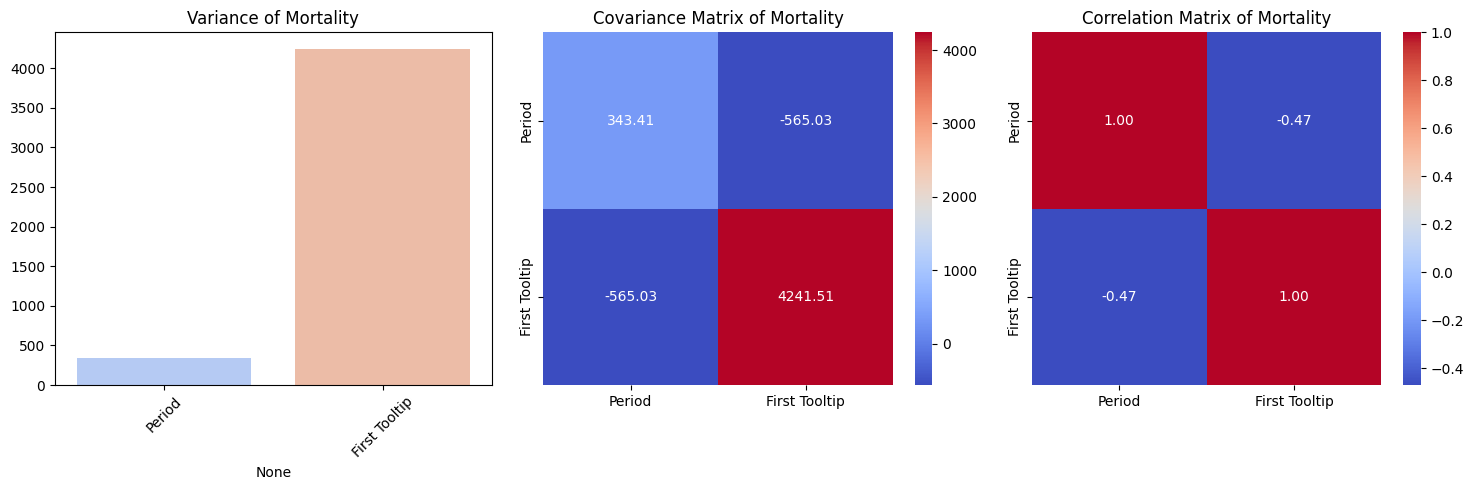

In [79]:
# List of merged datasets with their names and respective DataFrames
merged_datasets = [
    ('Health Services', merged_health_services),
    ('Region Expectancy', merged_region_expectancy),
    ('Life Expectancy', merged_life_expectancy),
    ('Disease Incidence', merged_disease_incidence),
    ('Maternal Health', merged_maternal_health),
    ('Mortality', merged_mortality)
]

# Calculate and plot variance, covariance, and correlation values for each dataset
for dataset_name, merged_df in merged_datasets:
    # Exclude columns
    columns_to_exclude = ['Decade', 'Indicator_encoded', 'Location_encoded']
    numeric_columns = merged_df.select_dtypes(include=np.number).drop(columns=columns_to_exclude, errors='ignore')
    
    # Calculate variance, covariance, and correlation
    variance_values = numeric_columns.var()
    covariance_matrix = numeric_columns.cov()
    correlation_matrix = numeric_columns.corr()
    
    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.barplot(x=variance_values.index, y=variance_values.values, palette='coolwarm')
    plt.title(f'Variance of {dataset_name}')
    plt.xticks(rotation=45)
    plt.subplot(1, 3, 2)
    sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Covariance Matrix of {dataset_name}')
    plt.subplot(1, 3, 3)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix of {dataset_name}')
    plt.tight_layout()
    plt.show()


### Split merged_mortality

In [80]:
# Define features (X) and target (y)
X_cols_mortality = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_mortality = 'First Tooltip'

X_mortality = merged_health_services[X_cols_mortality]  # Use the appropriate DataFrame here
y_mortality = merged_health_services[y_col_mortality]  # Use the appropriate DataFrame here

# Split data into training and test sets
X_train_mortality, X_test_mortality, y_train_mortality, y_test_mortality = train_test_split(X_mortality, y_mortality, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_mortality = scaler.fit_transform(X_train_mortality)
X_test_scaled_mortality = scaler.transform(X_test_mortality)

# Now can use X_train_scaled_mortality, X_test_scaled_mortality, y_train_mortality, y_test_mortality 
# For example:
# 1. Train model using X_train_scaled_mortality, y_train_mortality
# 2. Evaluate model using X_test_scaled_mortality, y_test_mortality


### Split merged_life_expectancy

In [81]:
# Define features (X) and target (y)
X_cols_life = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_life = 'First Tooltip'

X_life = merged_life_expectancy[X_cols_life]
y_life = merged_life_expectancy[y_col_life]

# Split data into training and test sets
X_train_life, X_test_life, y_train_life, y_test_life = train_test_split(X_life, y_life, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled_life = scaler.fit_transform(X_train_life)
X_test_scaled_life = scaler.transform(X_test_life)

# Now can use X_train_scaled_life, X_test_scaled_life, y_train_life, y_test_life 
# For example:
# 1. Train model using X_train_scaled_life, y_train_life
# 2. Evaluate model using X_test_scaled_life, y_test_life


### Split merged_region_expectancy

In [82]:
# Define features (X) and target (y)
X_cols_region = ['Location_encoded', 'Period', 'Indicator_encoded', 'Hale Expectency', 'Life expectany', '% OF HALE in life expectancy']
y_col_region = 'First Tooltip'

X_region = merged_region_expectancy[X_cols_region]
y_region = merged_region_expectancy[y_col_region]

# Split data into training and test sets
X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_region, y_region, test_size=0.2, random_state=42)

# Scale numerical features
scaler_region = StandardScaler()
X_train_scaled_region = scaler_region.fit_transform(X_train_region)
X_test_scaled_region = scaler_region.transform(X_test_region)

# Now can use X_train_scaled_region, X_test_scaled_region, y_train_region, y_test_region 
# For example:
# 1. Train model using X_train_scaled_region, y_train_region
# 2. Evaluate model using X_test_scaled_region, y_test_region

### Split merged_health_services

In [83]:
# Define features (X) and target (y)
X_cols_health = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_health = 'First Tooltip'

X_health = merged_health_services[X_cols_health]
y_health = merged_health_services[y_col_health]

# Split data into training and test sets
X_train_health, X_test_health, y_train_health, y_test_health = train_test_split(X_health, y_health, test_size=0.2, random_state=42)

# Scale numerical features
scaler_health = StandardScaler()
X_train_scaled_health = scaler_health.fit_transform(X_train_health)
X_test_scaled_health = scaler_health.transform(X_test_health)

# Now can use X_train_scaled_health, X_test_scaled_health, y_train_health, y_test_health
# For example:
# 1. Train model using X_train_scaled_health, y_train_health
# 2. Evaluate model using X_test_scaled_health, y_test_health


### Split merged_disease_incidence

In [84]:
# Define features (X) and target (y)
X_cols_disease = ['Location_encoded', 'Indicator_encoded', 'Period']
y_col_disease = 'First Tooltip'

X_disease = merged_disease_incidence[X_cols_disease]
y_disease = merged_disease_incidence[y_col_disease]

# Split data into training and test sets
X_train_disease, X_test_disease, y_train_disease, y_test_disease = train_test_split(X_disease, y_disease, test_size=0.2, random_state=42)

# Scale numerical features
scaler_disease = StandardScaler()
X_train_scaled_disease = scaler_disease.fit_transform(X_train_disease)
X_test_scaled_disease = scaler_disease.transform(X_test_disease)

# Now can use X_train_scaled_disease, X_test_scaled_disease, y_train_disease, y_test_disease 
# For example:
# 1. Train model using X_train_scaled_disease, y_train_disease
# 2. Evaluate model using X_test_scaled_disease, y_test_disease


### Split merged_maternal_health

In [85]:
# Define features (X) and target (y) for merged_maternal_health
X_cols_maternal = ['Location_encoded', 'Period', 'Indicator_encoded']
y_col_maternal = 'First Tooltip'

X_maternal = merged_maternal_health[X_cols_maternal]
y_maternal = merged_maternal_health[y_col_maternal]

# Split data into training and test sets
X_train_maternal, X_test_maternal, y_train_maternal, y_test_maternal = train_test_split(X_maternal, y_maternal, test_size=0.2, random_state=42)

# Scale numerical features
scaler_maternal = StandardScaler()
X_train_scaled_maternal = scaler_maternal.fit_transform(X_train_maternal)
X_test_scaled_maternal = scaler_maternal.transform(X_test_maternal)

# Now can use X_train_scaled_maternal, X_test_scaled_maternal, y_train_maternal, y_test_maternal 
# For example:
# 1. Train model using X_train_scaled_maternal, y_train_maternal
# 2. Evaluate model using X_test_scaled_maternal, y_test_maternal
